<a href="https://www.kaggle.com/code/danielacaroline/house-prices?scriptVersionId=125792148" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Importing libaries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import os

import nbformat
from nbconvert.preprocessors import ExecutePreprocessor

import matplotlib.pyplot as plt

# 1. Introdution

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

# 2. Data  Understanding

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [3]:
# Importing dataset
dirname = '/kaggle/input/house-prices-advanced-regression-techniques/'
df_train = pd.read_csv(dirname + "/train.csv")
df_test = pd.read_csv(dirname +"/test.csv")

In [4]:
df_train.shape

(1460, 81)

In [5]:
df_test.shape

(1459, 80)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [9]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [10]:
df_test.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000  ...   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000  ...   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1458.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    472.768861    93.174777    48.313914      24.243317     1.794380   
std     217.048611   127.744882    68.883364      67.227765    20.207842   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     318.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    28.000000       0.000000     0.000000   
75%     576.000000   168.000000    72.000000       0.000000     0.000000   
max    1488.000000  1424.000000   742.000000    1012.000000   360.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  
mean     17.064428     1.744345     58.167923     6.104181  2007.769705  
std      56.609763    30.491646    630.806978     2.722432     1.301740  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  17000.000000    12.000000  2010.000000  

[8 rows x 37 columns]

In [11]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [12]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [13]:
#Figure out whether there are duplicate row in train set
df_train.groupby(df_train.duplicated().tolist()).size()

False    1460
dtype: int64

In [14]:
#Figure out whether there are duplicate row in test set
df_test.groupby(df_test.duplicated().tolist()).size()

False    1459
dtype: int64

***Comments***
* Some features have missing values in training set
* There is no duplicate values on training and testing set
* Separing the dataset betweeen numerical and categorical variables for better analysis

## Numerical features Exploration

In [15]:
#Get numerical variables
df_train_num = df_train.select_dtypes(include = 'number')
df_test_num = df_test.select_dtypes(include = 'number')

In [16]:
df_train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [17]:
df_test_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1444 non-null   float64
 9   BsmtFinSF1     1458 non-null   float64
 10  BsmtFinSF2     1458 non-null   float64
 11  BsmtUnfSF      1458 non-null   float64
 12  TotalBsmtSF    1458 non-null   float64
 13  1stFlrSF       1459 non-null   int64  
 14  2ndFlrSF       1459 non-null   int64  
 15  LowQualFinSF   1459 non-null   int64  
 16  GrLivArea      1459 non-null   int64  
 17  BsmtFullBath   1457 non-null   float64
 18  BsmtHalf

### Data Distribution

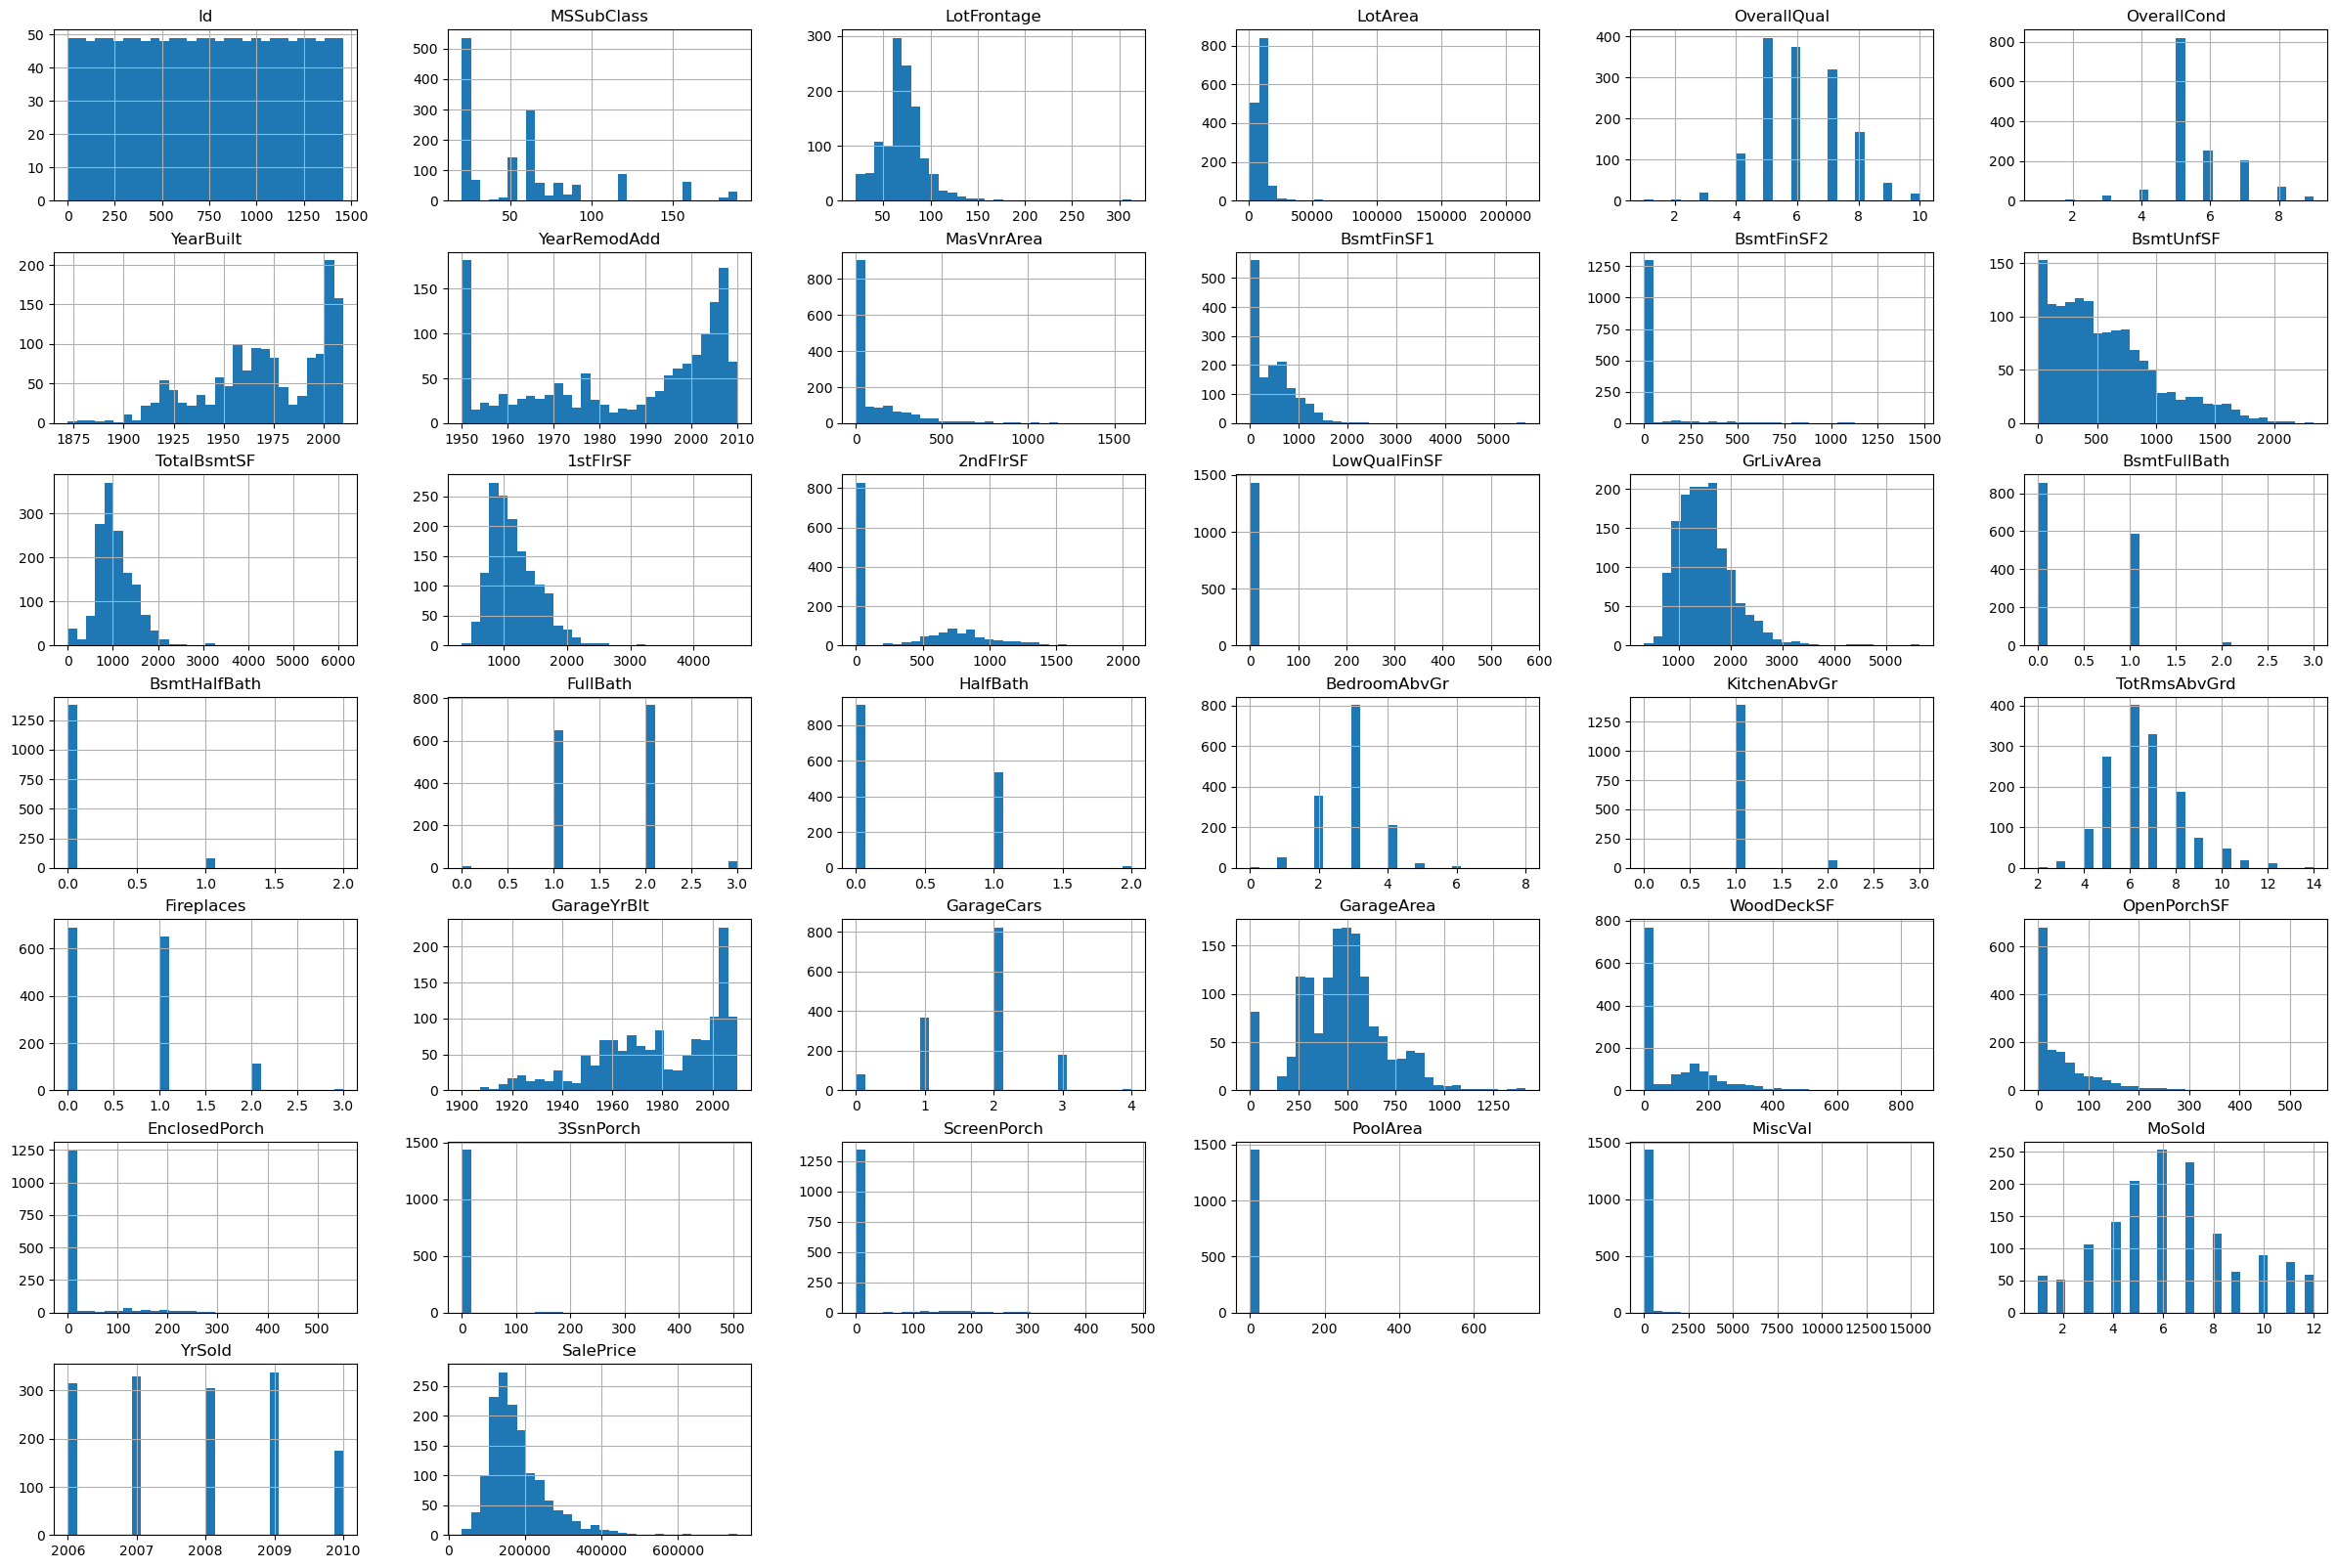

In [18]:
#Distribution of traning set
hist = df_train_num.hist(figsize = (30,20), bins= 30)

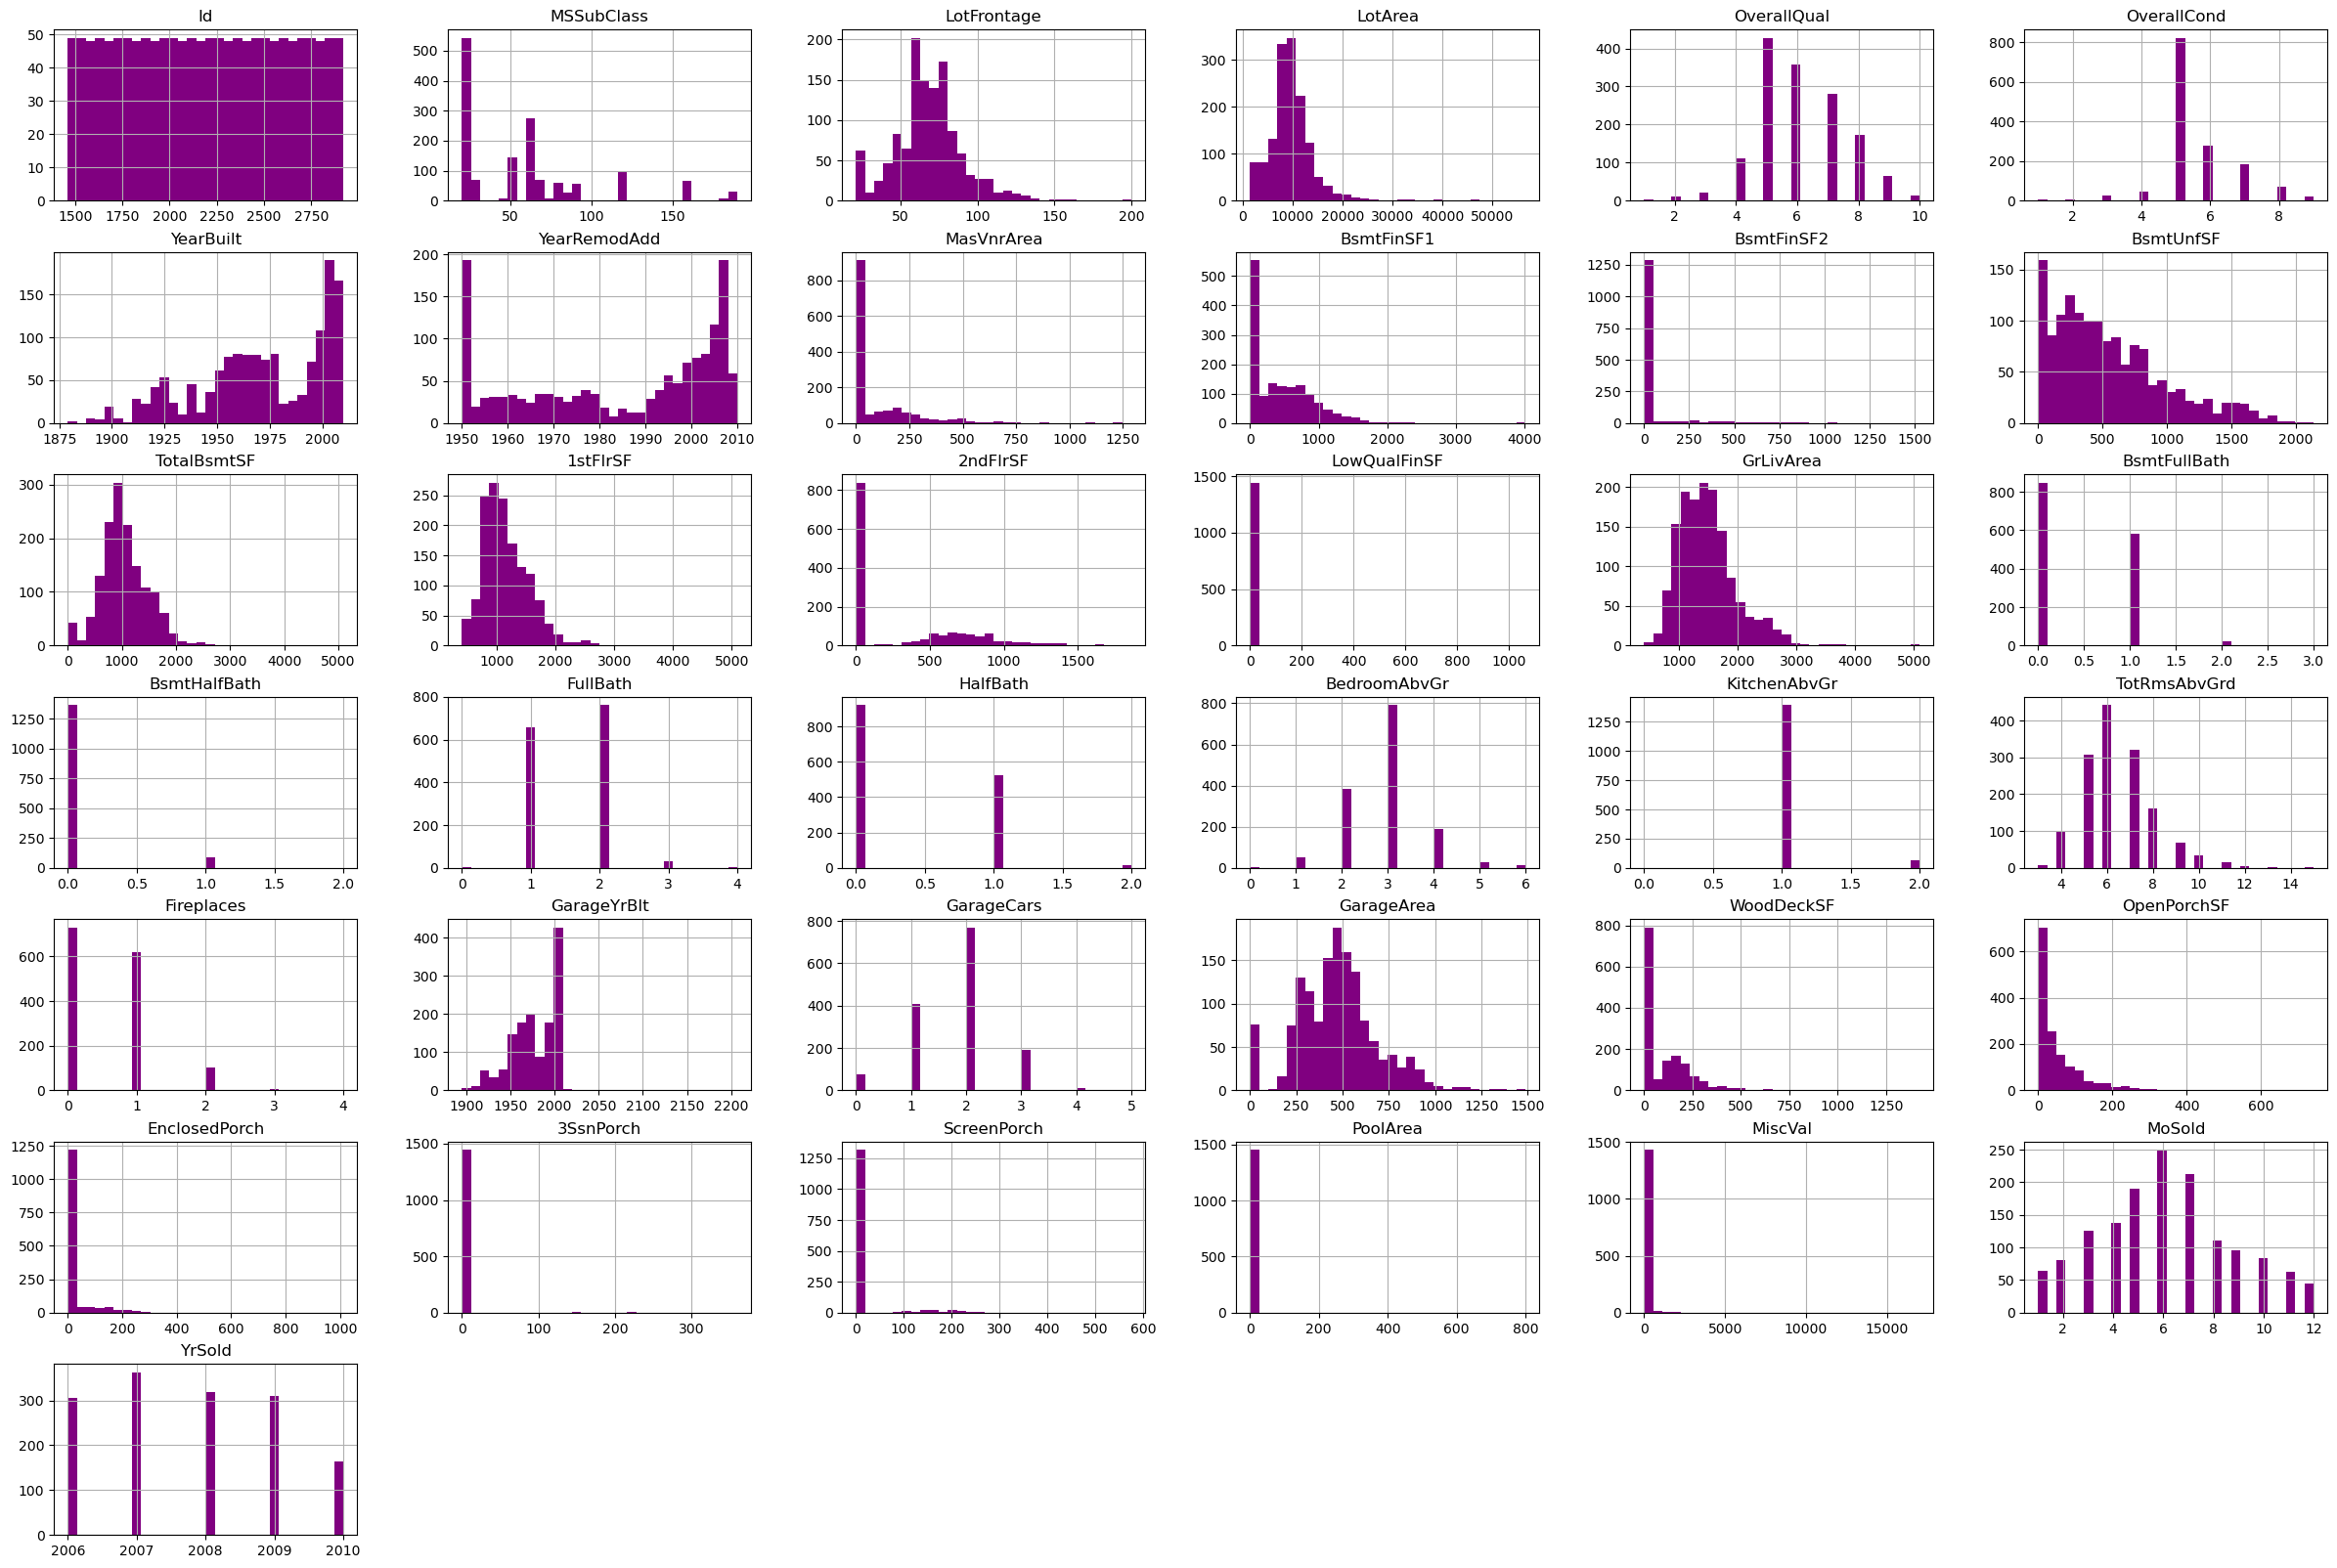

In [19]:
#Distribution of testing set
hist = df_test_num.hist(figsize = (30,20), bins= 30, color = 'purple')

***Comments***
* Some features are unbalanced and need to be removed or treated later not to interfere with the model

### Missing Values

In [20]:
#Figure out features with missing values training set
df_train_num[df_train_num.columns[df_train_num.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrArea   1452 non-null   float64
 2   GarageYrBlt  1379 non-null   float64
dtypes: float64(3)
memory usage: 34.3 KB


In [21]:
#Figure out features with missing values testing set
df_test_num[df_test_num.columns[df_test_num.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1232 non-null   float64
 1   MasVnrArea    1444 non-null   float64
 2   BsmtFinSF1    1458 non-null   float64
 3   BsmtFinSF2    1458 non-null   float64
 4   BsmtUnfSF     1458 non-null   float64
 5   TotalBsmtSF   1458 non-null   float64
 6   BsmtFullBath  1457 non-null   float64
 7   BsmtHalfBath  1457 non-null   float64
 8   GarageYrBlt   1381 non-null   float64
 9   GarageCars    1458 non-null   float64
 10  GarageArea    1458 non-null   float64
dtypes: float64(11)
memory usage: 125.5 KB


In [22]:
def percent_missing_data(df):
   columns = ['Column', 'PercentMissing']
   df_missing_values = pd.DataFrame(columns=columns)
   for column in df.columns[df.isnull().any()]:          
      qt_data_null =  df[str(column)].isnull().value_counts()[True]   
      percent = qt_data_null/df.shape[0]*100
      new_row = pd.DataFrame([[str(column), percent]], columns=columns)
      df_missing_values = pd.concat([df_missing_values, new_row])
    
   return df_missing_values       

<AxesSubplot:xlabel='Column', ylabel='PercentMissing'>

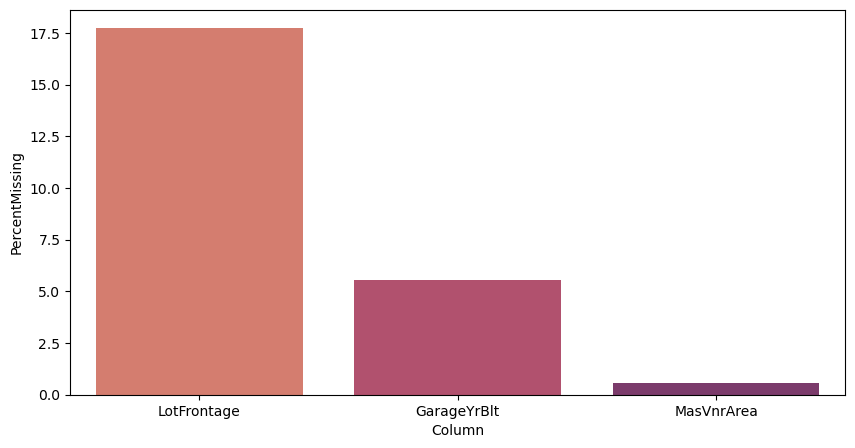

In [23]:
#percent missing data traning set
df_train_missing_values = percent_missing_data(df_train_num).sort_values(by = 'PercentMissing', ascending= False)
plt.figure(figsize=(10,5))
sns.color_palette("flare")
sns.barplot(data = df_train_missing_values,  x = 'Column', y= 'PercentMissing', palette='flare')

<AxesSubplot:xlabel='Column', ylabel='PercentMissing'>

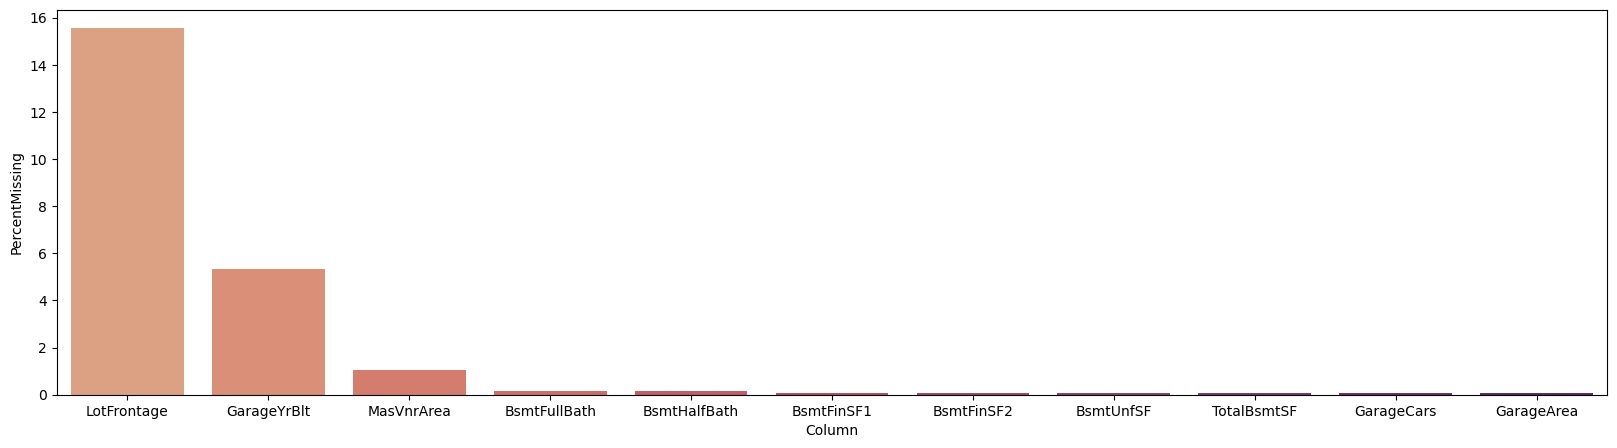

In [24]:
df_test_missing_values = percent_missing_data(df_test_num).sort_values(by = 'PercentMissing', ascending= False)
plt.figure(figsize=(20,5))
sns.color_palette("flare")
sns.barplot(data = df_test_missing_values,  x = 'Column', y= 'PercentMissing', palette='flare')

***Comments***

* All features have more the 80% of the values not null, so all them will be keep and the missing values input.


### Preprocessing Data

#### Taking care of missing data

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = "mean")

#Imputation in training set
imputer.fit(df_train_num)
df_train_num_impute = pd.DataFrame(imputer.transform(df_train_num), columns =  df_train_num.columns)

In [26]:
#getting dataframes before and after imputation training set
df_train_missing_values_before = df_train_num[df_train_missing_values['Column'].tolist()]
df_train_missing_values_after = df_train_num_impute[df_train_missing_values['Column'].tolist()]

In [27]:
#Imputation in testing set
imputer.fit(df_test_num)
df_test_num_impute = pd.DataFrame(imputer.transform(df_test_num), columns =  df_test_num.columns)

In [28]:
#getting dataframes before and after imputation testing set
df_test_missing_values_before = df_test_num[df_test_missing_values['Column'].tolist()]
df_test_missing_values_after = df_test_num_impute[df_test_missing_values['Column'].tolist()]

In [29]:
def distributionMissingDataAfterInput(df_before_imput, df_after_imput, df_missing_values):
    ax = 0
    fig, axes = plt.subplots(df_missing_values.shape[0], 2, figsize=(20, 40))
    for column in df_before_imput.columns:       
        b = sns.histplot(ax = axes[ax,0], x = df_before_imput[str(column)], kde= True)
        b.set(title = 'Before input')
        a = sns.histplot(ax = axes[ax,1], x = df_after_imput[str(column)], kde= True, color='purple')
        a.set(title = 'After input')
        ax=ax+1

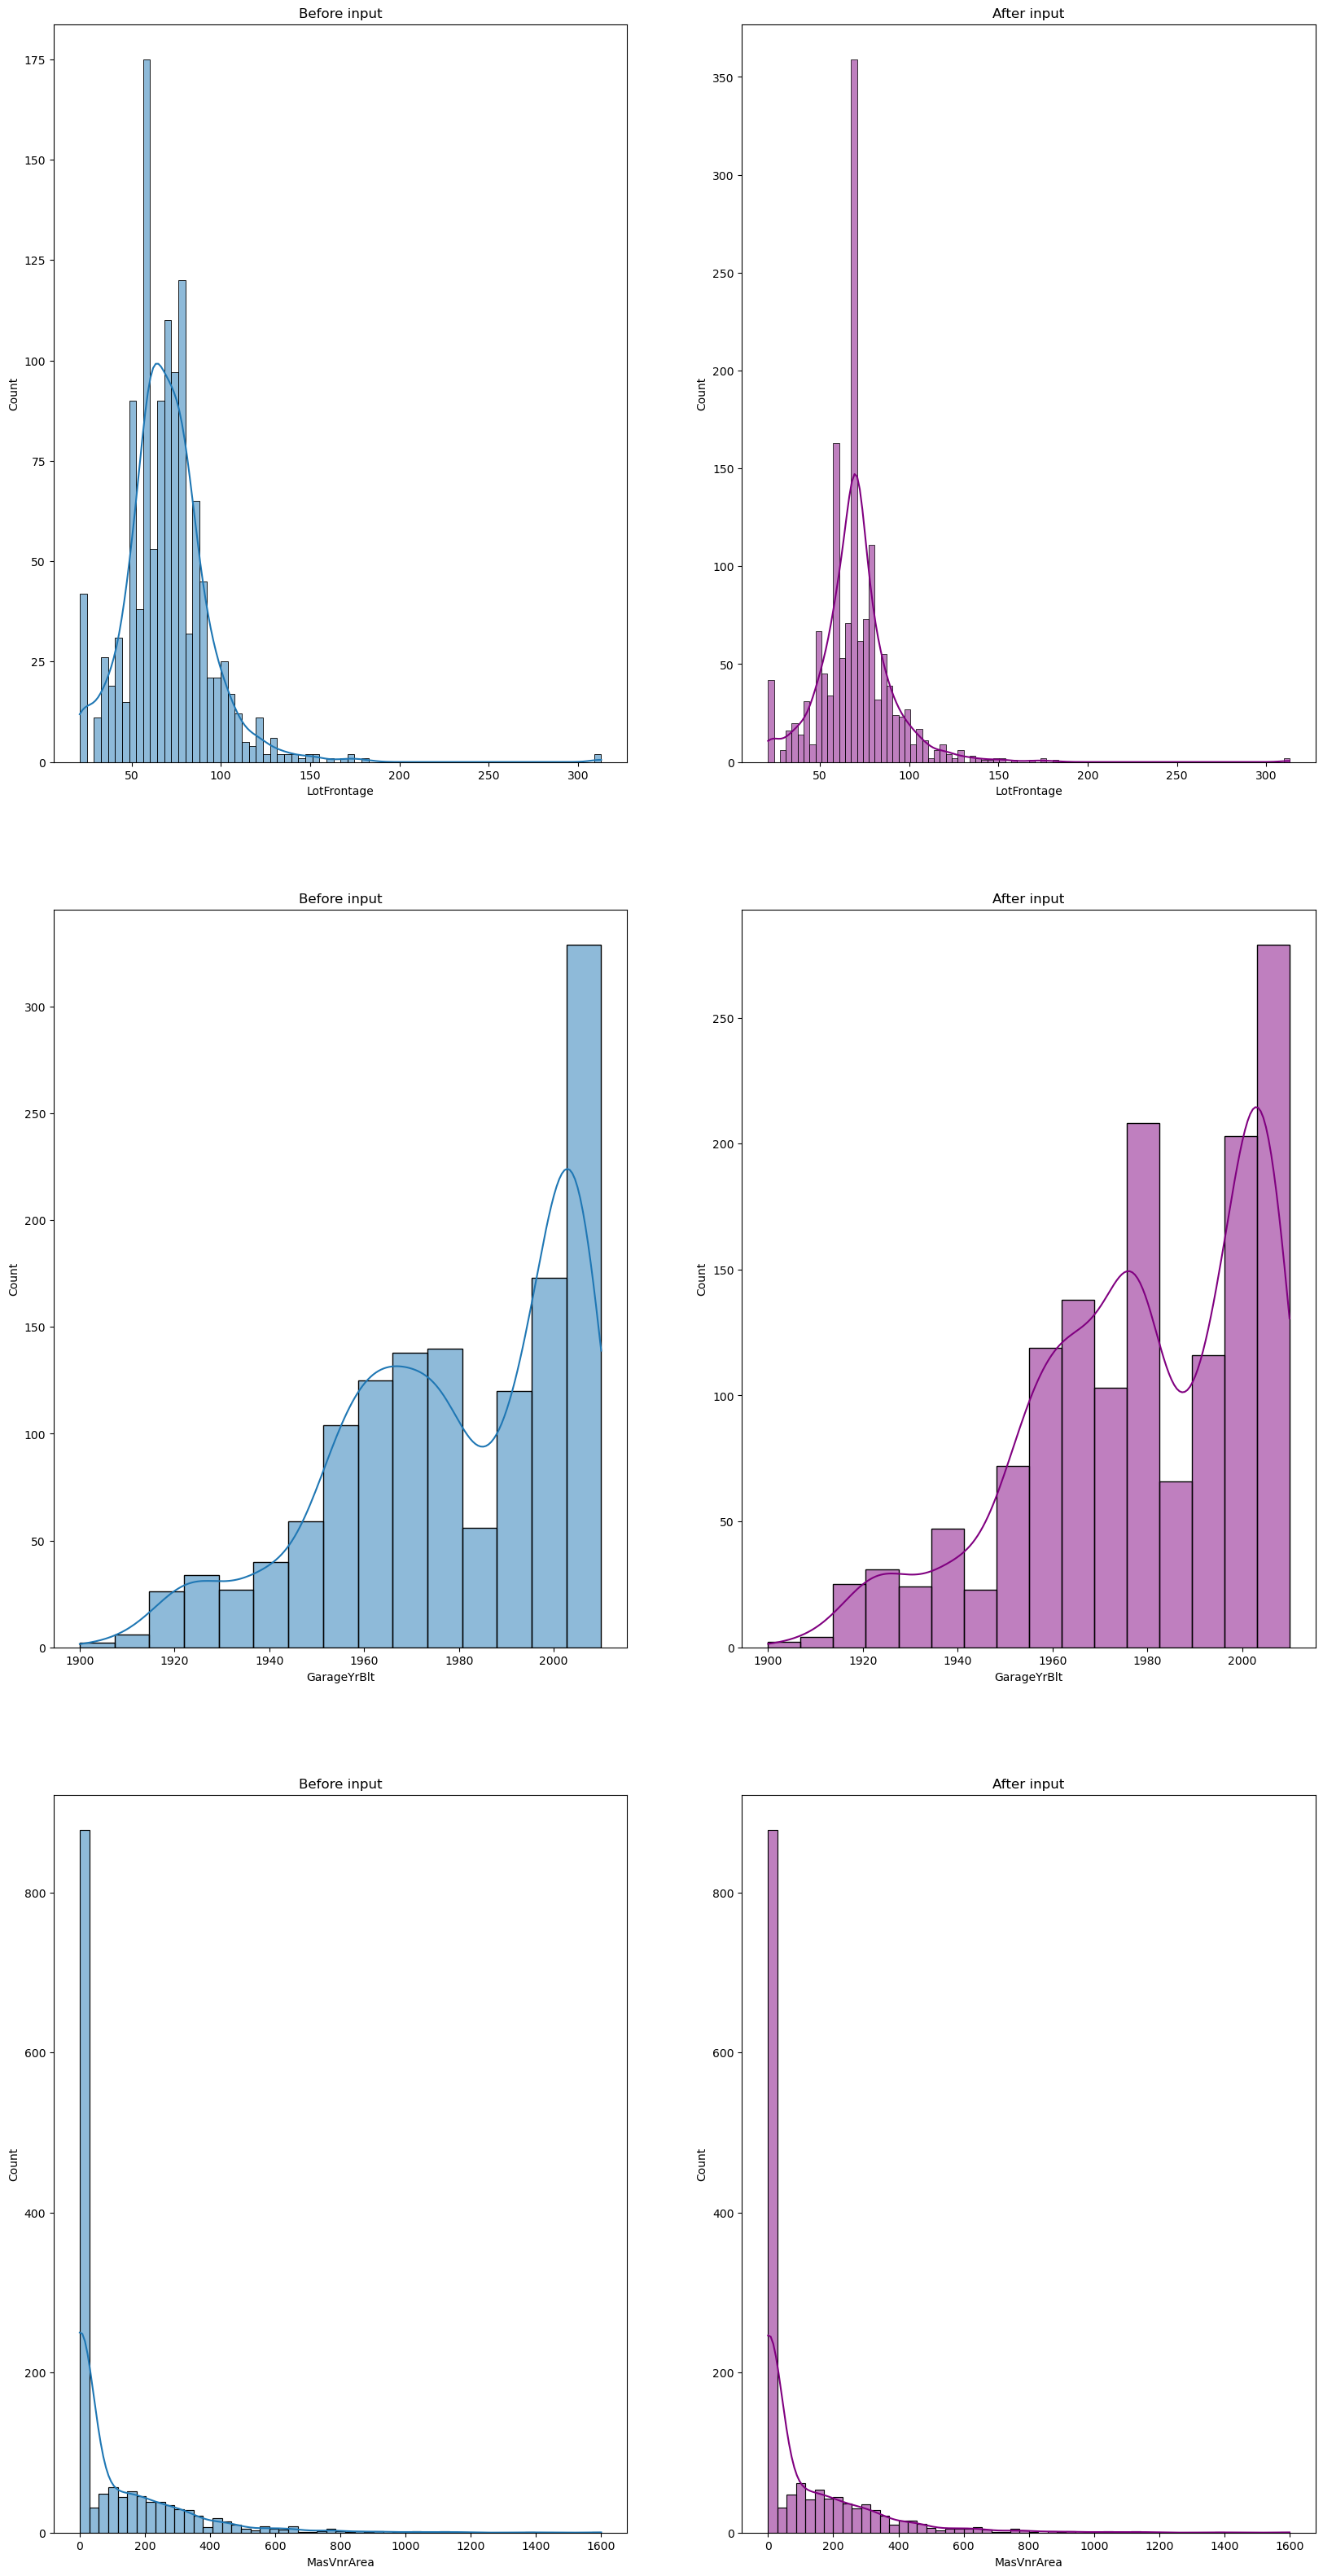

In [30]:
#traning test
distributionMissingDataAfterInput(df_train_missing_values_before, df_train_missing_values_after, df_train_missing_values)

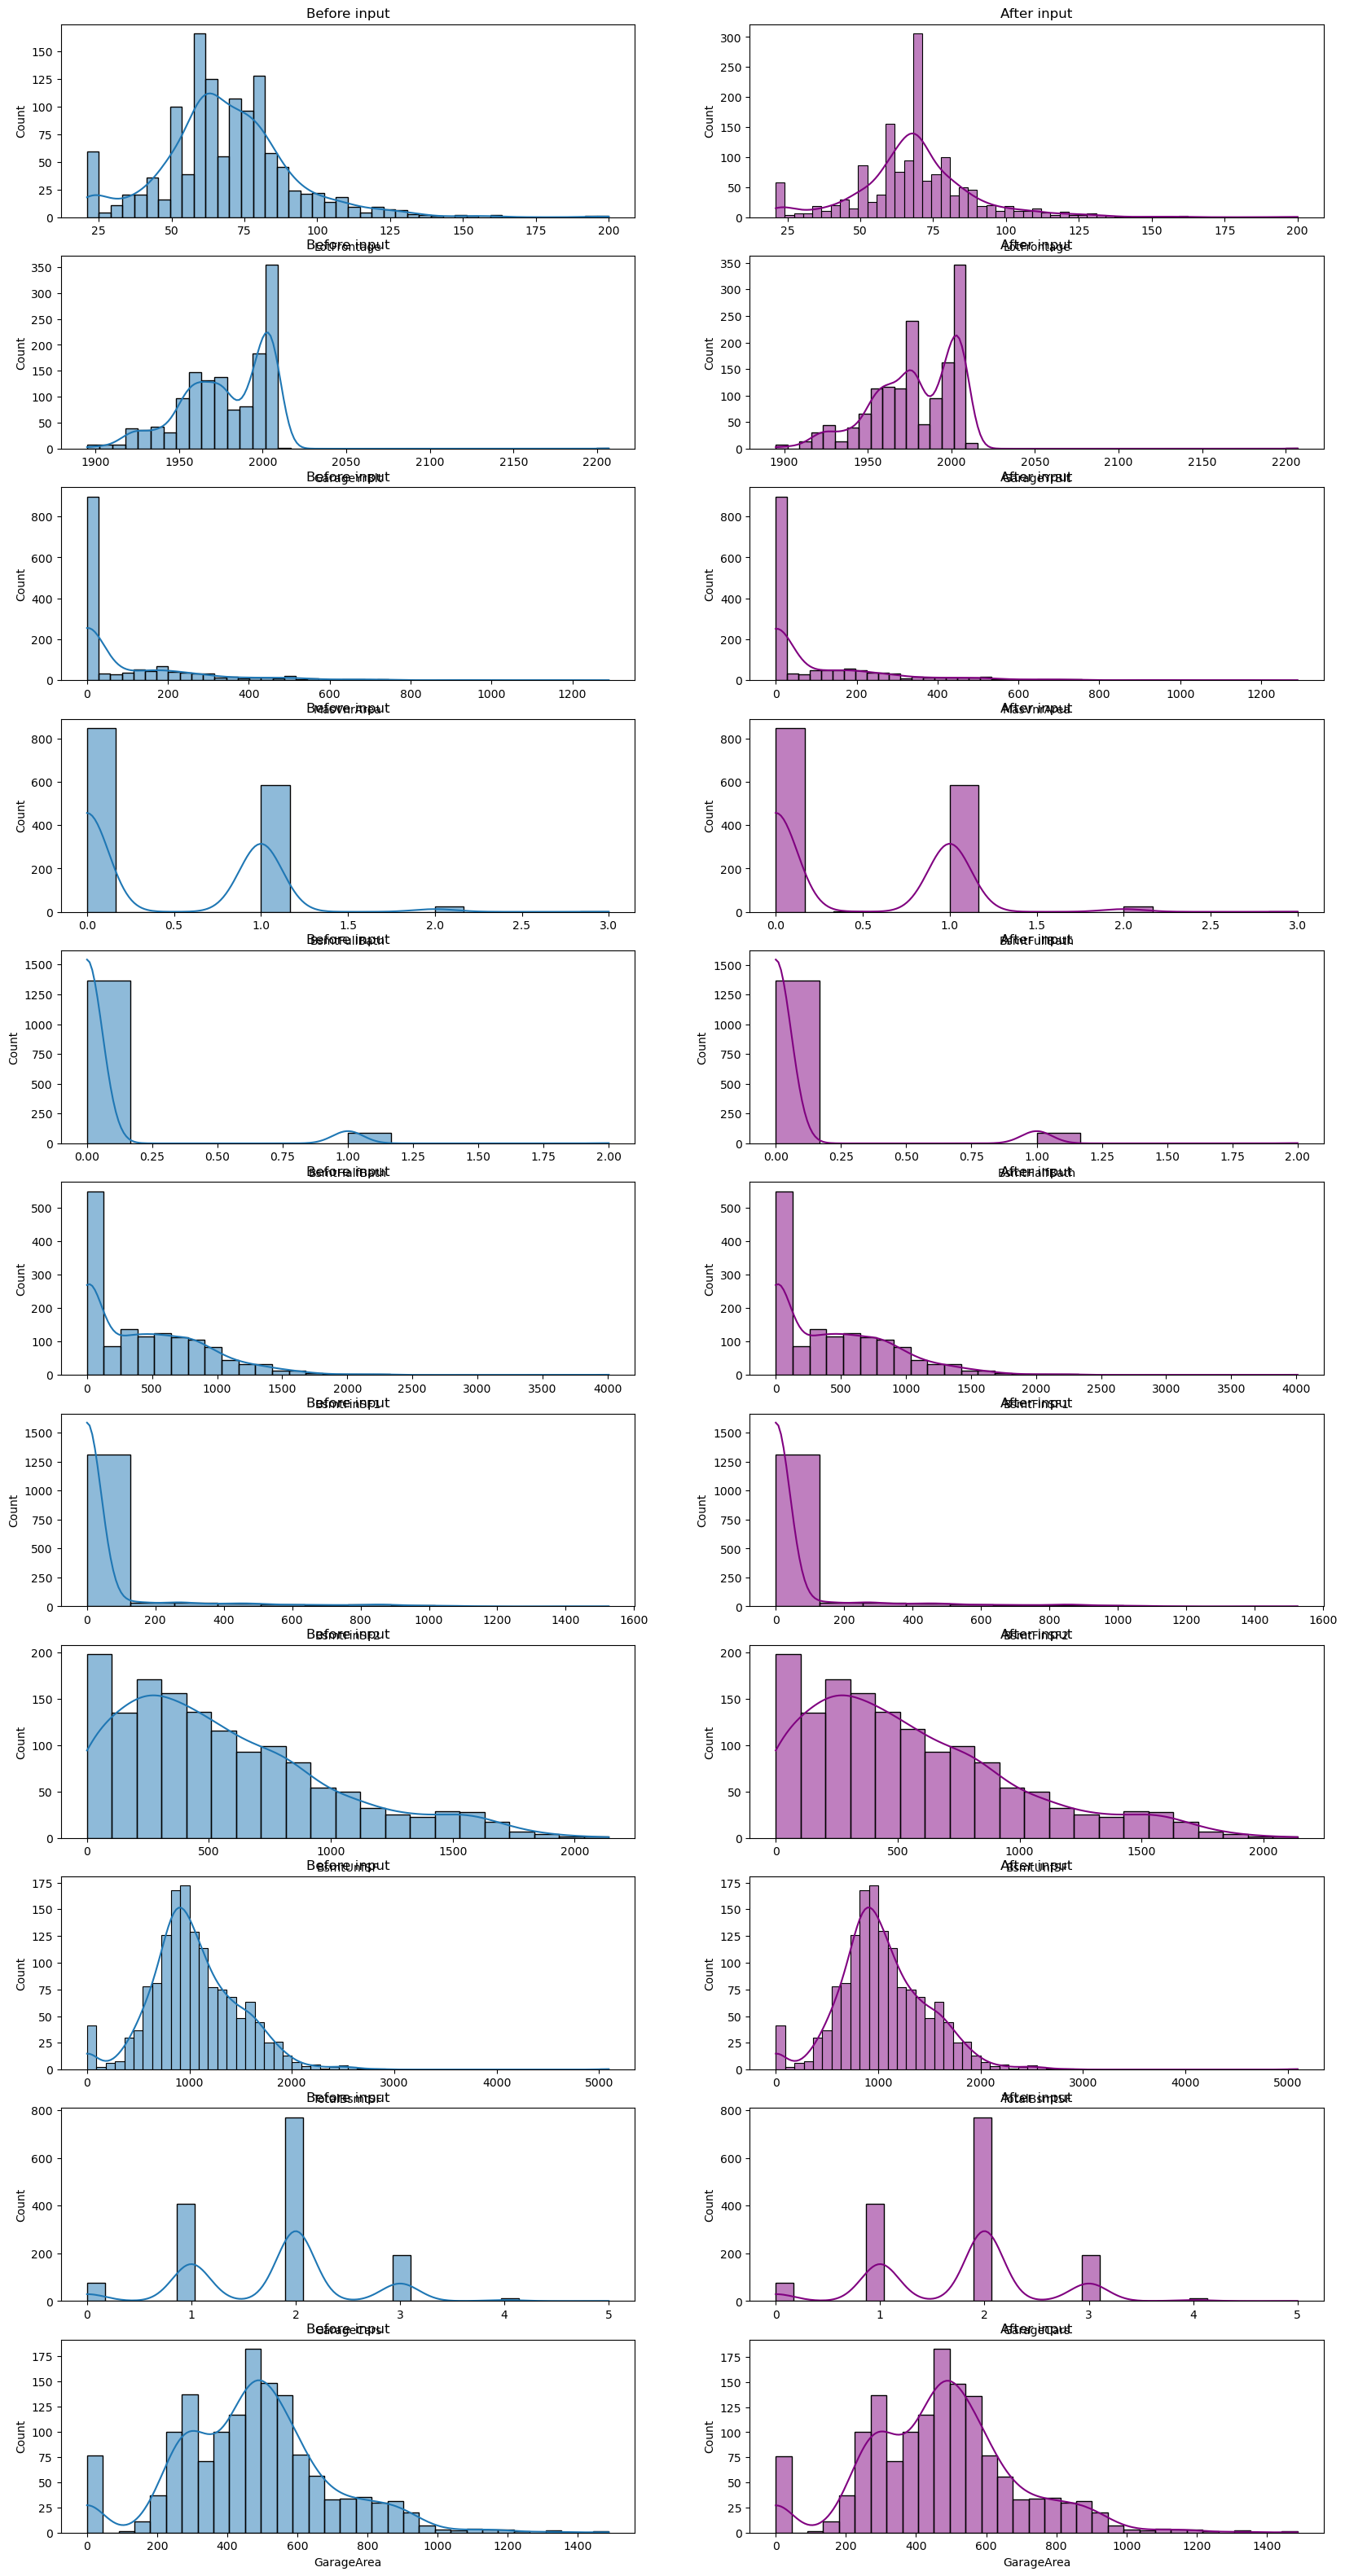

In [31]:
#testing test
distributionMissingDataAfterInput(df_test_missing_values_before, df_test_missing_values_after, df_test_missing_values)

**Removing features**

***Comments***
* The distribution of 'LotFrontage' feature cheaged a lot after the imputation, this can disturb the result because the other features keep the previous distribution. So this feature will be dropped.

In [32]:
df_train_num_impute.drop(['LotFrontage'], axis=1, inplace = True)
df_test_num_impute.drop(['LotFrontage'], axis=1, inplace = True)

#### Correlation

**Removing features**

***Comments***
* The feature ***id*** will be droped because it does not interfere in the result

In [33]:
df_train_num_impute.drop(['Id'], axis=1, inplace = True)
df_test_num_impute.drop(['Id'], axis=1, inplace = True)

##### Correlation among features and target

In [34]:
def correlation_per_varible(df_train):
    ax= 1
    plt.subplots(figsize=(25, 60))
    for column in df_train.columns:
        plt.subplot(9,4,ax)
        plt.xticks(rotation = 45)
        sns.regplot(data = df_train, x = column, y= 'SalePrice', scatter_kws = {'color': 'purple', 'alpha':0.3}, line_kws = {'color': 'blue'})
        ax= ax+1

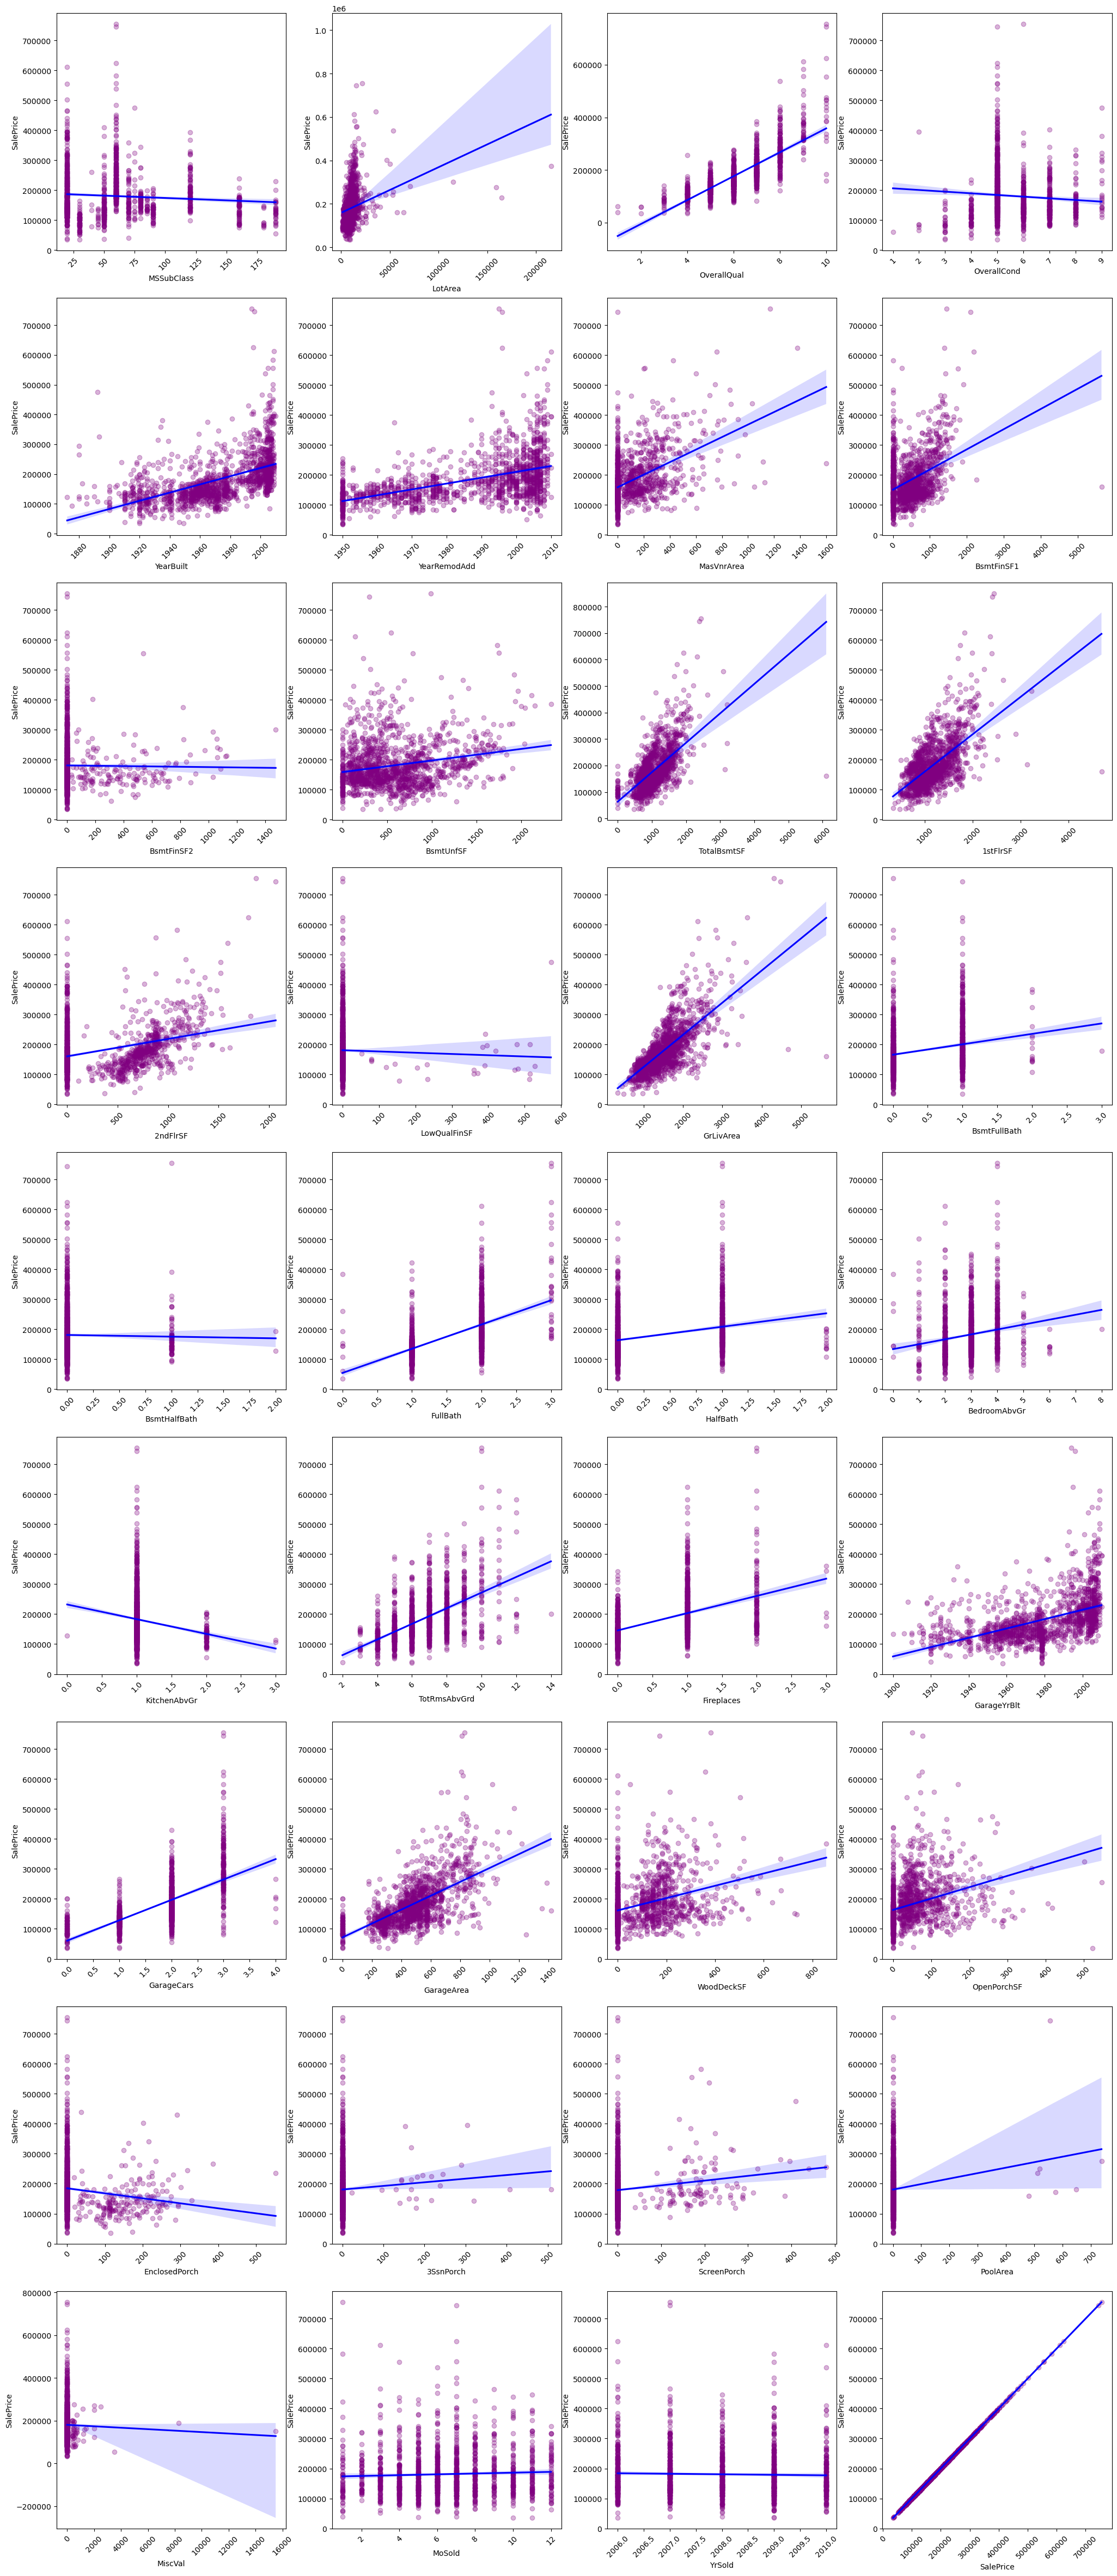

In [35]:
correlation_per_varible(df_train_num_impute)

***Comments***
* In some graphs it is possible to note that there may be a linear relationship between Feature and the target varible 'SalePrice' such as: OverallQual, GrLivArea, GarageArea.

##### Correlation among features 

<AxesSubplot:>

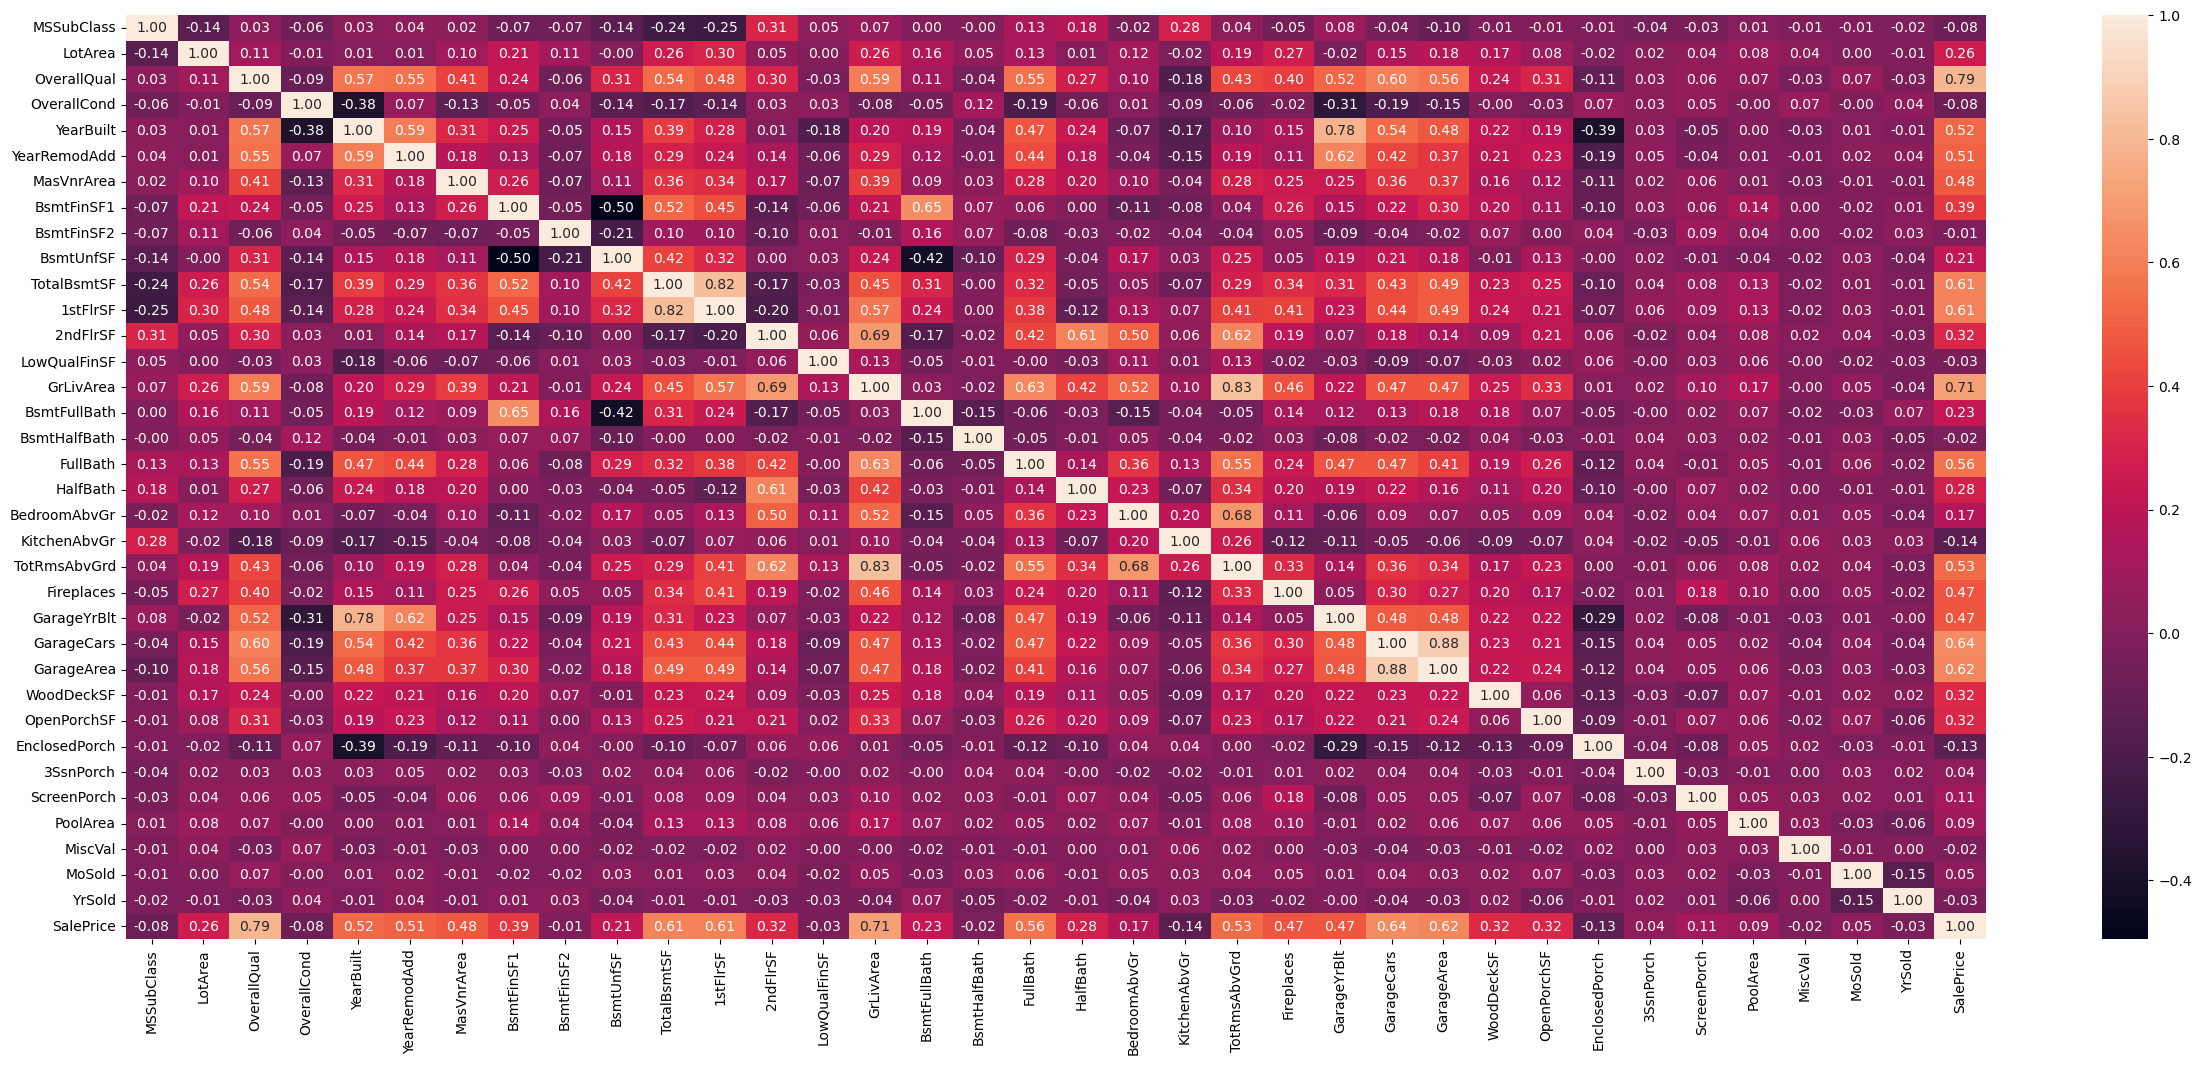

In [36]:
plt.figure(figsize=(30,12))
sns.heatmap(df_train_num_impute.corr(), annot=True, fmt= '.2f')

The Scale of Pearson's Correlation Coefficient

|Scale of correlation coefficient  | Value  |
|---|---|
|0 < r ≤ 0.19  | Very Low  |
|0.2 ≤ r ≤ 0.39 | Low   |
|0.4 ≤ r ≤ 0.59 | Moderate  |
|0.6 ≤ r ≤ 0.79 | High  |
|0.8 ≤ r ≤ 1.0 | Very High  |

***Comments***

* Some features have very high and high correlation with each other, such as:
    * 'YearBuild' and 'GarageYrBlt' - 0.78
    * 'TotalBsmtSF' and '1stFlrSF' - 0.82
    * 'TotRmsAbvGrd' and 'GrLivArea' - 0.83
    * 'GarageCars' and 'GarageArea' - 0.88

* Some features have high correlation with the target feature, in this order:
    * 'OverallQual' - 0.79
    * 'GrLivArea' - 0.71
    * 'GarageCars' - 0.64
    * 'GarageArea' - 0.62
    * 'TotalBsmtSF' - 0.61
    * '1stFlrSF' - 0.61
    
* Some features have moderate correlation with the target feature, in this order:
    * 'FullBath' - 0.56
    * 'TotRmsAbvGrd' - 0.53
    * 'YearBuilt' - 0.52
    * 'YearRemodAdd' - 0.51
    * 'MasVnrArea' - 0.48

**Removing features**

***Comments***
* The features that have very low correlation with the target feature will be dropped

In [37]:
#Figuring out feature with low corralation with the target feature
sr_corr_saleprice = df_train_num_impute.corr()['SalePrice']
feature_not_retained = sr_corr_saleprice[abs(sr_corr_saleprice) < 0.2].index.tolist()
feature_not_retained

['MSSubClass',
 'OverallCond',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [38]:
#dropping the features
df_train_num_impute.drop(feature_not_retained, axis=1, inplace = True)
df_test_num_impute.drop(feature_not_retained, axis=1, inplace = True)

***Comments***
* Features with high correlation with each other only one of them will be kept. The one with the highest correlation with the target feature:
    * 'YearBuild' 
    * '1stFlrSF'
    * 'GrLivArea'
    * 'GarageCars'

In [39]:
feature_not_retained = ['GarageYrBlt','TotalBsmtSF','TotRmsAbvGrd','GarageArea']
df_train_num_impute.drop(feature_not_retained, axis=1, inplace = True)
df_test_num_impute.drop(feature_not_retained, axis=1, inplace = True)

#### Creating new features

In [40]:
#creating new feature
df_train_num_impute['AgeBuild'] = df_train_num_impute['YearBuilt'].max() - df_train_num_impute['YearBuilt']  
df_test_num_impute['AgeBuild'] = df_test_num_impute['YearBuilt'].max() - df_test_num_impute['YearBuilt']

#dropping 'YearBuilt' feature
df_train_num_impute.drop('YearBuilt', axis=1, inplace = True)
df_test_num_impute.drop('YearBuilt', axis=1, inplace = True)

In [41]:
# Creating `ModificAge` feature
df_train_num_impute['AgeRemode'] = df_train_num_impute['YearRemodAdd'].max() - df_train_num_impute['YearRemodAdd']  
df_test_num_impute['AgeRemode'] = df_test_num_impute['YearRemodAdd'].max() - df_test_num_impute['YearRemodAdd']
# Dropping `YearRemodAdd` feature
df_train_num_impute.drop('YearRemodAdd', axis=1, inplace=True)
df_test_num_impute.drop('YearRemodAdd', axis=1, inplace=True)

### 2.1.3.4. Feature Selection

In [42]:
X = df_train_num_impute.drop('SalePrice', axis=1)
y = df_train_num_impute['SalePrice']

        Feature        Score        P-Value
0     BsmtUnfSF    70.303948   1.182976e-16
0  BsmtFullBath    79.300912   1.550344e-18
0       LotArea   109.090355   1.123139e-24
0      HalfBath   128.018964   1.650473e-28
0   OpenPorchSF   161.577391   3.493374e-35
0      2ndFlrSF   165.561151   5.764335e-36
0    WoodDeckSF   171.494673   3.972217e-37
0    BsmtFinSF1   255.923517   3.394110e-53
0    Fireplaces   406.503866   6.141487e-80
0    MasVnrArea   425.366422   3.924712e-83
0     AgeRemode   504.714855   3.164948e-96
0      AgeBuild   548.665821  2.990229e-103
0      FullBath   668.430296  1.236470e-121
0      1stFlrSF   845.524488  5.394711e-147
0    GarageCars  1013.705666  2.498644e-169
0     GrLivArea  1470.585010  4.518034e-223
0   OverallQual  2436.770591  2.185675e-313


<AxesSubplot:xlabel='Feature', ylabel='Score'>

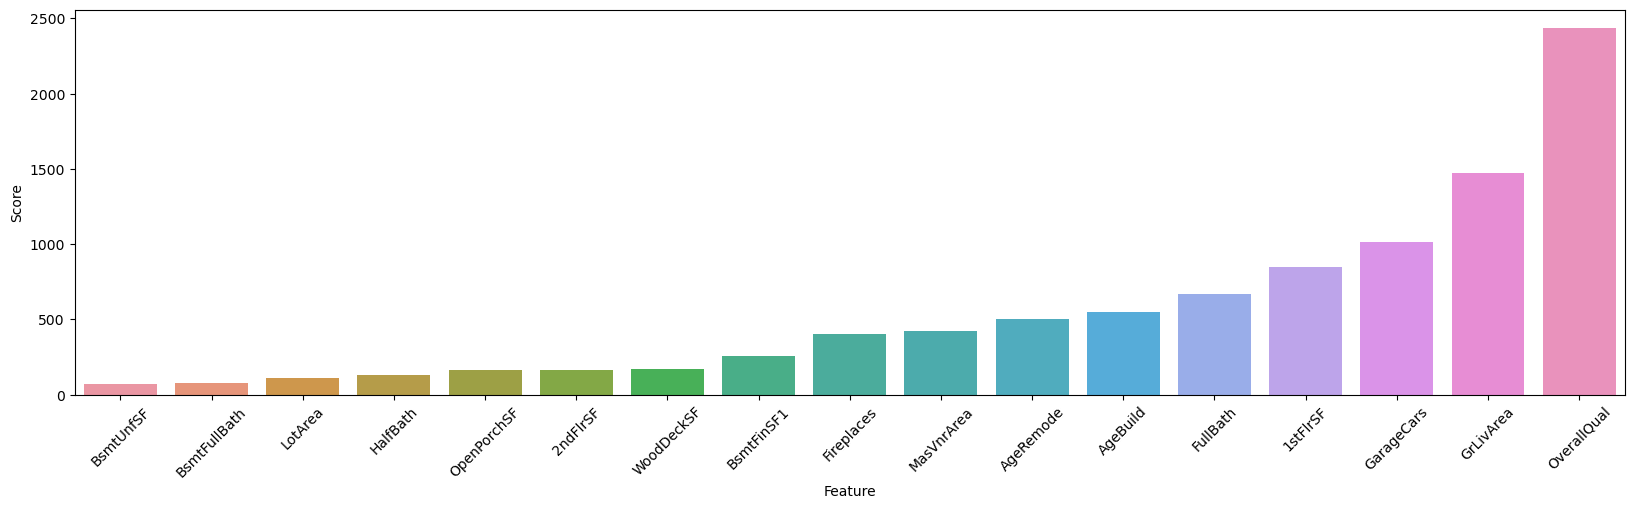

In [43]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(f_regression, k=2)
X_new = fs.fit_transform(X, y)
columns = ['Feature', 'Score', 'P-Value']
df_fs = pd.DataFrame(columns=columns)
for i in range(len(fs.scores_)):    
    new_row = pd.DataFrame([[X.columns[i], fs.scores_[i], fs.pvalues_[i]]], columns=columns)   
    df_fs = pd.concat([df_fs, new_row])

df_fs = df_fs.sort_values(by = 'Score')
print(df_fs)
plt.figure(figsize=(20,5))  
plt.xticks(rotation =45)  
sns.barplot(data = df_fs, x = 'Feature', y= 'Score')

***Comments***
* All features will be kept because p-value<0.01, then it is highly significant

**Dealing with skew data**

* "A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical."

* https://docs.oracle.com/cd/E57185_01/CBREG/ch03s02s03s01.html#:~:text=A%20skewness%20value%20greater%20than,the%20distribution%20is%20fairly%20symmetrical.

In [44]:
sr_train_num_skew = df_train_num_impute.skew().sort_values(ascending = False)
sr_train_num_skew

LotArea         12.207688
MasVnrArea       2.676412
OpenPorchSF      2.364342
SalePrice        1.882876
BsmtFinSF1       1.685503
WoodDeckSF       1.541376
1stFlrSF         1.376757
GrLivArea        1.366560
BsmtUnfSF        0.920268
2ndFlrSF         0.813030
HalfBath         0.675897
Fireplaces       0.649565
AgeBuild         0.613461
BsmtFullBath     0.596067
AgeRemode        0.503562
OverallQual      0.216944
FullBath         0.036562
GarageCars      -0.342549
dtype: float64

In [45]:
feature_high_skew = sr_train_num_skew[abs(sr_train_num_skew) >= 0.5].index.tolist()
feature_high_skew

['LotArea',
 'MasVnrArea',
 'OpenPorchSF',
 'SalePrice',
 'BsmtFinSF1',
 'WoodDeckSF',
 '1stFlrSF',
 'GrLivArea',
 'BsmtUnfSF',
 '2ndFlrSF',
 'HalfBath',
 'Fireplaces',
 'AgeBuild',
 'BsmtFullBath',
 'AgeRemode']

In [46]:
feature_high_skew.remove('SalePrice')

log transformation: transform skewed distribution to a normal distribution

In [47]:
# Log transform multiple columns in dataframe 
#training test
df_train_num_impute_log = df_train_num_impute.copy()
df_train_num_impute_log[feature_high_skew] = df_train_num_impute_log[feature_high_skew].apply(lambda x: np.log1p(x))
df_train_num_impute_log['SalePrice'] = df_train_num_impute_log['SalePrice'].apply(lambda x: np.log1p(x))

#testing test
df_test_num_impute_log = df_test_num_impute.copy()
df_test_num_impute_log[feature_high_skew] = df_test_num_impute_log[feature_high_skew].apply(lambda x: np.log1p(x))

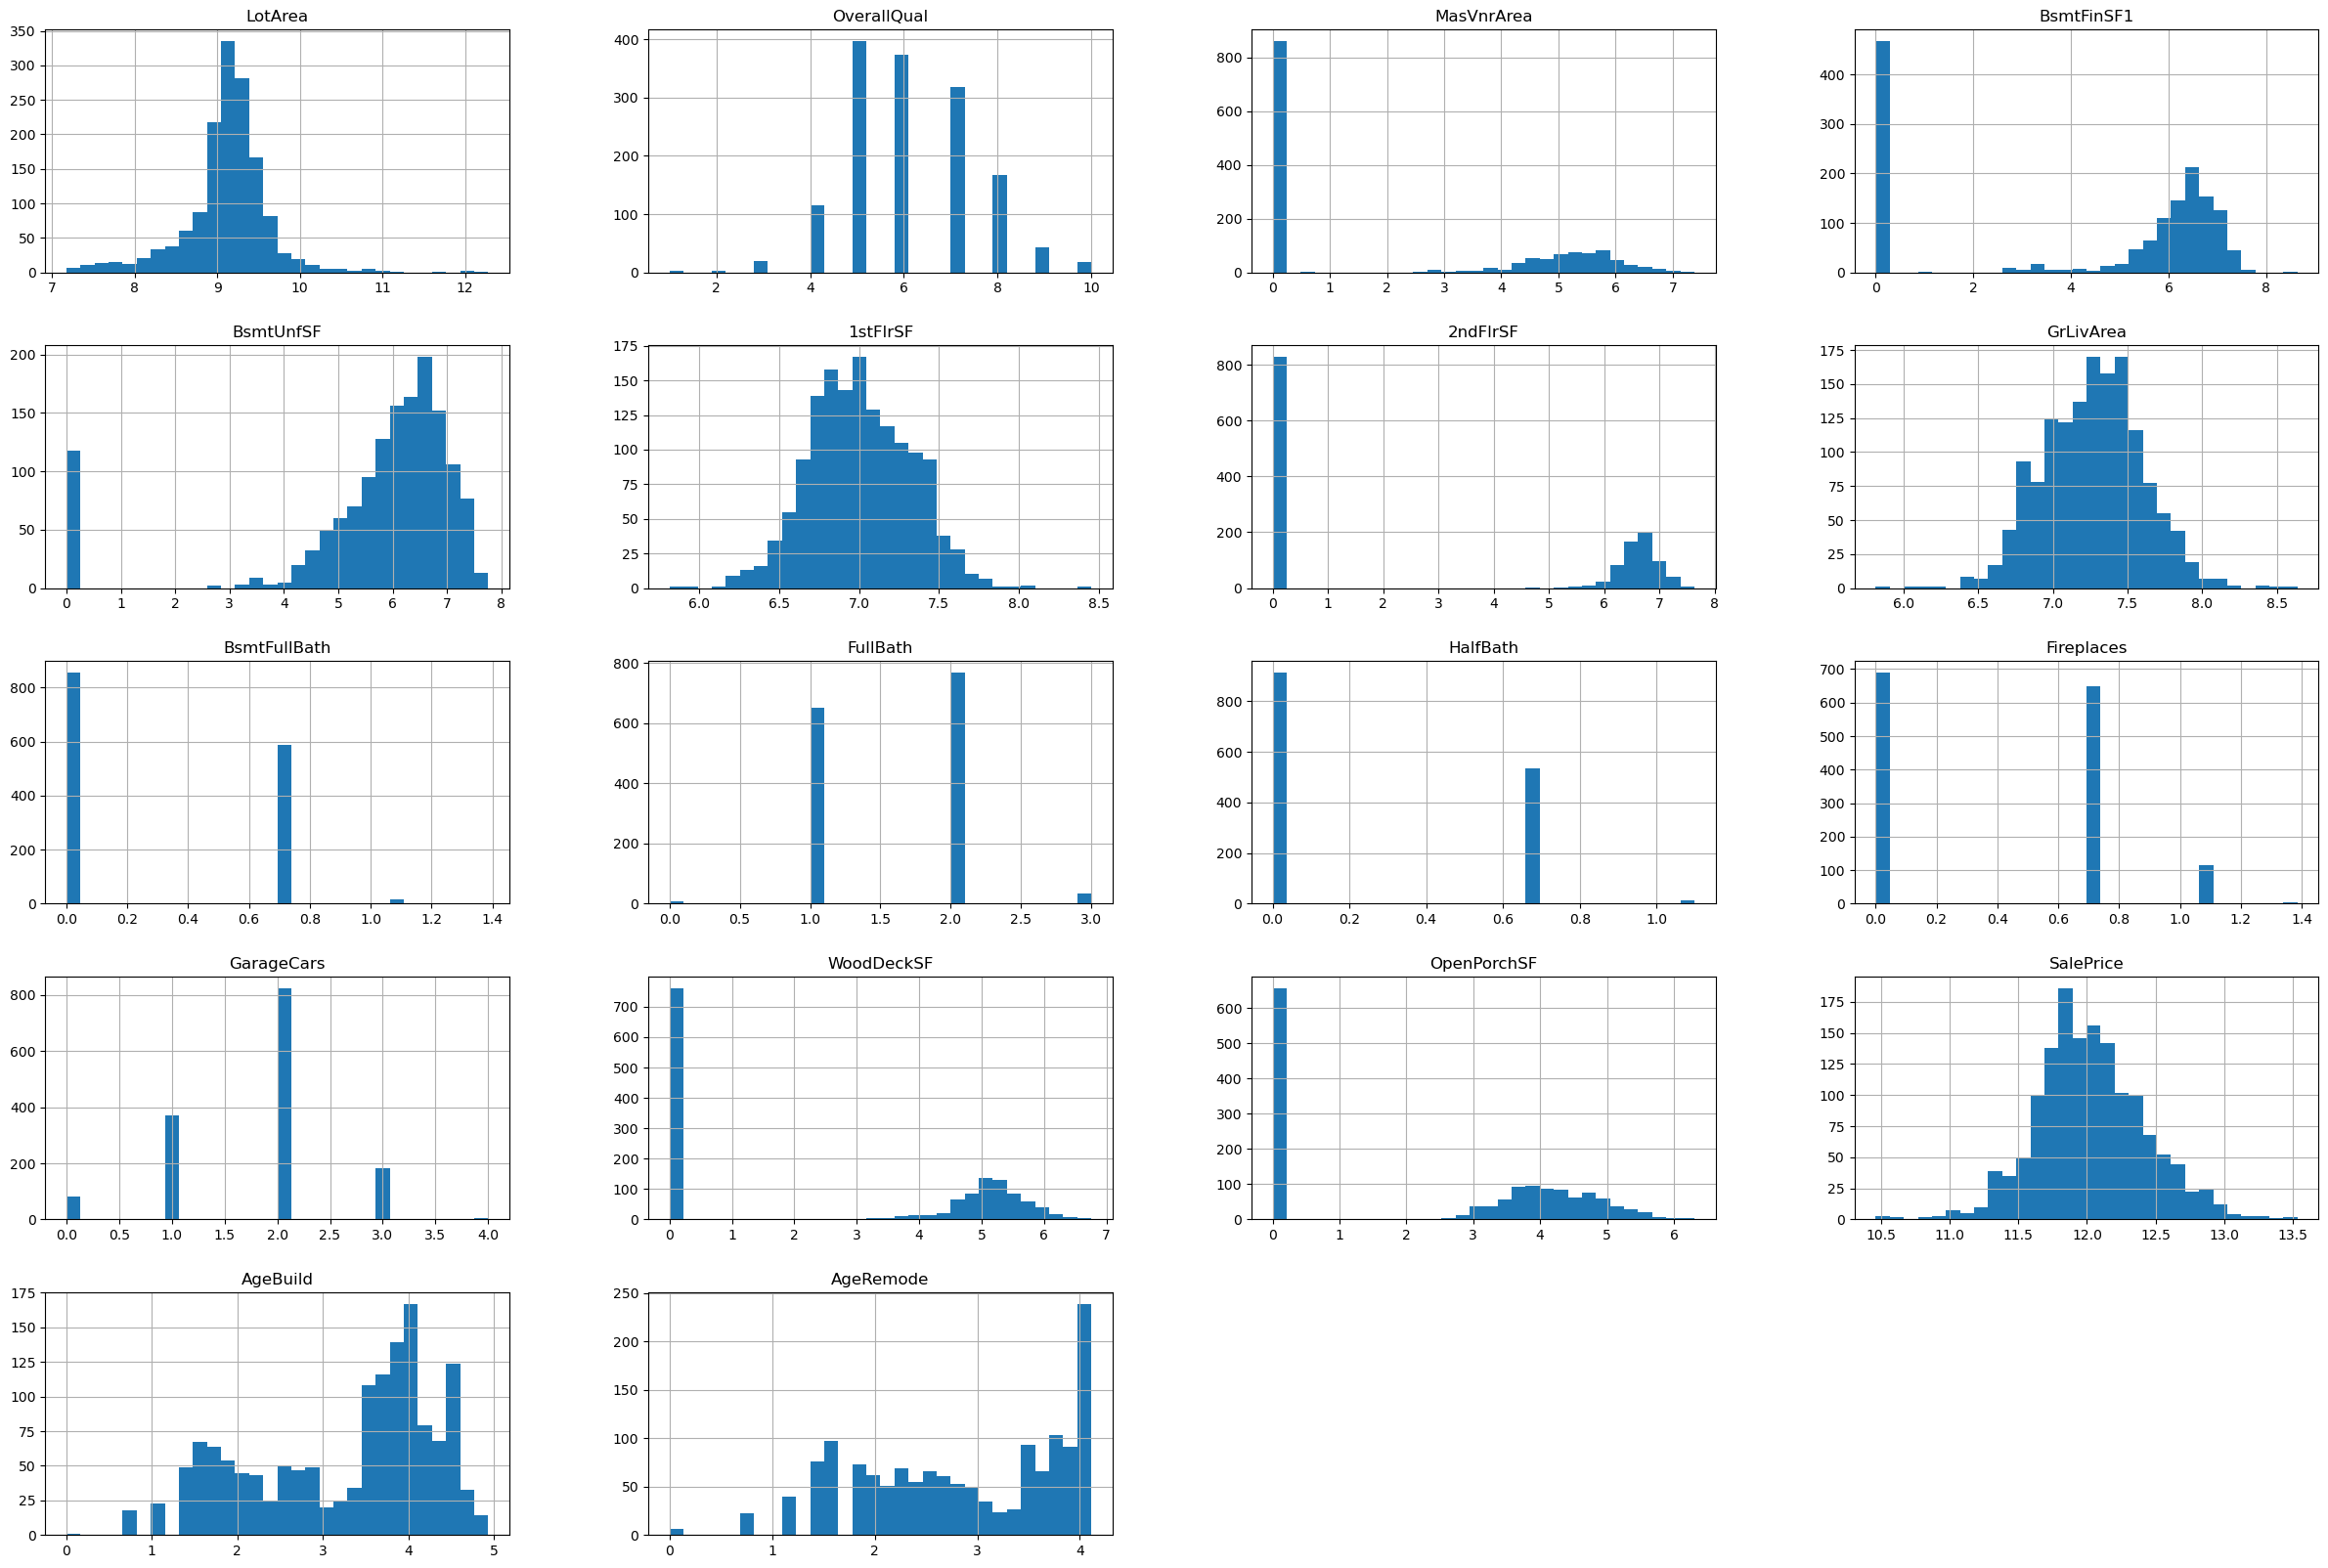

In [48]:
#Distribution of traning set after log
hist = df_train_num_impute_log.hist(figsize = (30,20), bins= 30)

In [49]:
hist = df_test_num_impute_log.hist(figsize = (30,20), bins= 20, color = 'purple')

## Categorical features Exploration

In [50]:
df_train_cat = df_train.select_dtypes(include = 'object')
df_test_cat = df_test.select_dtypes(include = 'object')

In [51]:
df_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [52]:
df_test_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1455 non-null   object
 1   Street         1459 non-null   object
 2   Alley          107 non-null    object
 3   LotShape       1459 non-null   object
 4   LandContour    1459 non-null   object
 5   Utilities      1457 non-null   object
 6   LotConfig      1459 non-null   object
 7   LandSlope      1459 non-null   object
 8   Neighborhood   1459 non-null   object
 9   Condition1     1459 non-null   object
 10  Condition2     1459 non-null   object
 11  BldgType       1459 non-null   object
 12  HouseStyle     1459 non-null   object
 13  RoofStyle      1459 non-null   object
 14  RoofMatl       1459 non-null   object
 15  Exterior1st    1458 non-null   object
 16  Exterior2nd    1458 non-null   object
 17  MasVnrType     1443 non-null   object
 18  ExterQual      1459 non-null

### Data Distribution

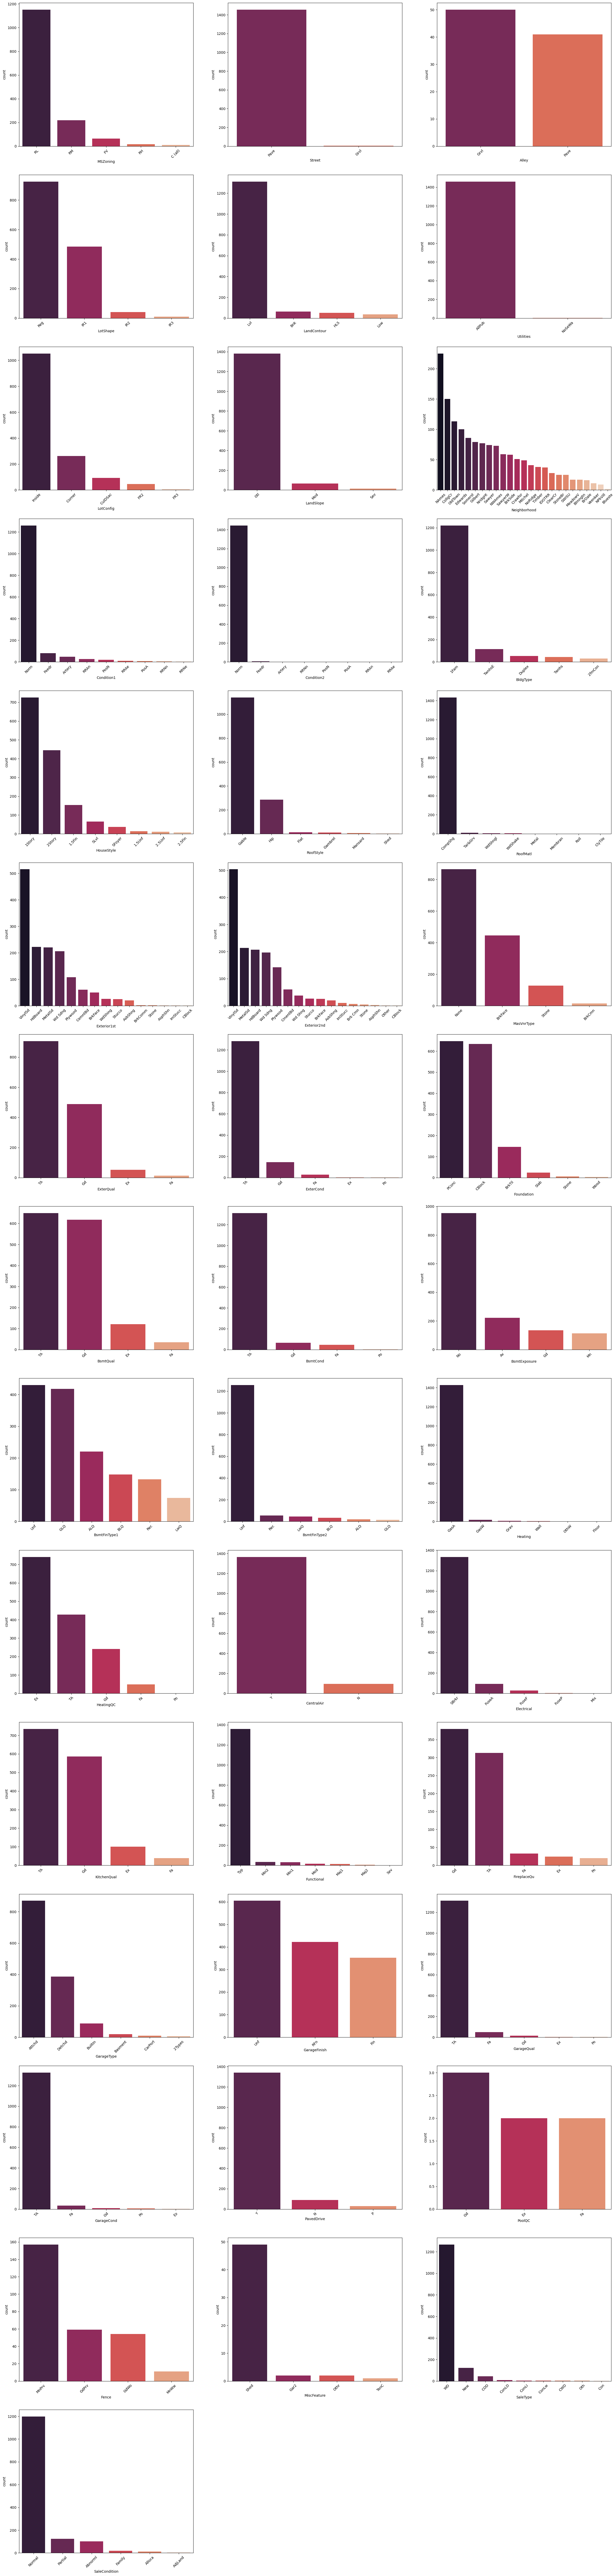

In [53]:
ax = 1
plt.subplots(figsize=(30, 130))

for column in df_train_cat.columns:
    plt.subplot(15,3,ax)
    plt.xticks(rotation = 45)
    sns.countplot(data = df_train_cat, x = column, order = df_train_cat[str(column)].value_counts().index, palette='rocket')
    ax = ax+1


***Comments***
* Some features most of the values are the same, making the data unbalanced

### Missing Values

In [54]:
df_train_cat[df_train_cat.columns[df_train_cat.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Alley         91 non-null     object
 1   MasVnrType    1452 non-null   object
 2   BsmtQual      1423 non-null   object
 3   BsmtCond      1423 non-null   object
 4   BsmtExposure  1422 non-null   object
 5   BsmtFinType1  1423 non-null   object
 6   BsmtFinType2  1422 non-null   object
 7   Electrical    1459 non-null   object
 8   FireplaceQu   770 non-null    object
 9   GarageType    1379 non-null   object
 10  GarageFinish  1379 non-null   object
 11  GarageQual    1379 non-null   object
 12  GarageCond    1379 non-null   object
 13  PoolQC        7 non-null      object
 14  Fence         281 non-null    object
 15  MiscFeature   54 non-null     object
dtypes: object(16)
memory usage: 182.6+ KB


In [55]:
#percent missing data
df_missing_values = percent_missing_data(df_train_cat)
df_missing_values_sort = df_missing_values.sort_values(by = 'PercentMissing', ascending= False)
print(df_missing_values_sort)
plt.figure(figsize=(25,5))
sns.barplot(data = df_missing_values_sort,  x = 'Column', y= 'PercentMissing', palette='rocket')
    

         Column  PercentMissing
0        PoolQC       99.520548
0   MiscFeature       96.301370
0         Alley       93.767123
0         Fence       80.753425
0   FireplaceQu       47.260274
0    GarageType        5.547945
0  GarageFinish        5.547945
0    GarageQual        5.547945
0    GarageCond        5.547945
0  BsmtExposure        2.602740
0  BsmtFinType2        2.602740
0      BsmtQual        2.534247
0      BsmtCond        2.534247
0  BsmtFinType1        2.534247
0    MasVnrType        0.547945
0    Electrical        0.068493


<AxesSubplot:xlabel='Column', ylabel='PercentMissing'>

***Comments***
* Some features have more de 40% missing, so this features will be dropped, such as:
'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'

### Preprocessing Data

 **Removing features**

In [56]:
#dropping the feature that have more de 40% missing
df_train_cat.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace = True)
df_test_cat.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


***Comments***
* Features with more the 90% of values in the same category will be dropped

In [57]:
#Features with more the 90% of values in the same category 
unbalanced_feature = []
for column  in df_train_cat.columns:
    sr_train_cat = df_train_cat.value_counts(column, normalize=True)
    if any(num >= 0.9 for num in sr_train_cat.values):
        unbalanced_feature.append(column)

unbalanced_feature

['Street',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'BsmtCond',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive']

In [58]:
#dropping features with more the 90% of values in the same category
df_train_cat.drop(unbalanced_feature, axis=1, inplace = True)
df_test_cat.drop(unbalanced_feature, axis=1, inplace = True)

**Taking care of missing data**

In [59]:
df_train_cat[df_train_cat.columns[df_train_cat.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MasVnrType    1452 non-null   object
 1   BsmtQual      1423 non-null   object
 2   BsmtExposure  1422 non-null   object
 3   BsmtFinType1  1423 non-null   object
 4   BsmtFinType2  1422 non-null   object
 5   GarageType    1379 non-null   object
 6   GarageFinish  1379 non-null   object
dtypes: object(7)
memory usage: 80.0+ KB


In [60]:
df_test_cat[df_test_cat.columns[df_test_cat.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      1455 non-null   object
 1   Exterior1st   1458 non-null   object
 2   Exterior2nd   1458 non-null   object
 3   MasVnrType    1443 non-null   object
 4   BsmtQual      1415 non-null   object
 5   BsmtExposure  1415 non-null   object
 6   BsmtFinType1  1417 non-null   object
 7   BsmtFinType2  1417 non-null   object
 8   KitchenQual   1458 non-null   object
 9   GarageType    1383 non-null   object
 10  GarageFinish  1381 non-null   object
 11  SaleType      1458 non-null   object
dtypes: object(12)
memory usage: 136.9+ KB


In [61]:
#getting list of missing categorical data
features_cat_missing_train = df_train_cat[df_train_cat.columns[df_train_cat.isnull().any()]].columns.tolist()
features_cat_missing_test = df_test_cat[df_test_cat.columns[df_test_cat.isnull().any()]].columns.tolist()

In [62]:
df_train_cat_imput= df_train_cat.apply(lambda x: x.fillna(x.mode()[0]))
df_test_cat_imput= df_test_cat.apply(lambda x: x.fillna(x.mode()[0]))

In [63]:
def distributionMissingDataAfterInputCat(df_before_imput, df_after_imput, features_cat_missing):
    ax = 0
    fig, axes = plt.subplots(len(features_cat_missing), 2, figsize=(30, 50))
    for column in df_before_imput.columns:           
        b = sns.histplot(ax = axes[ax,0], data = df_before_imput, x = column)   
        b.set(title = 'Before input')
        a = sns.histplot(ax = axes[ax,1], data = df_after_imput, x = column, color='purple')
        a.set(title = 'After input')
        ax=ax+1

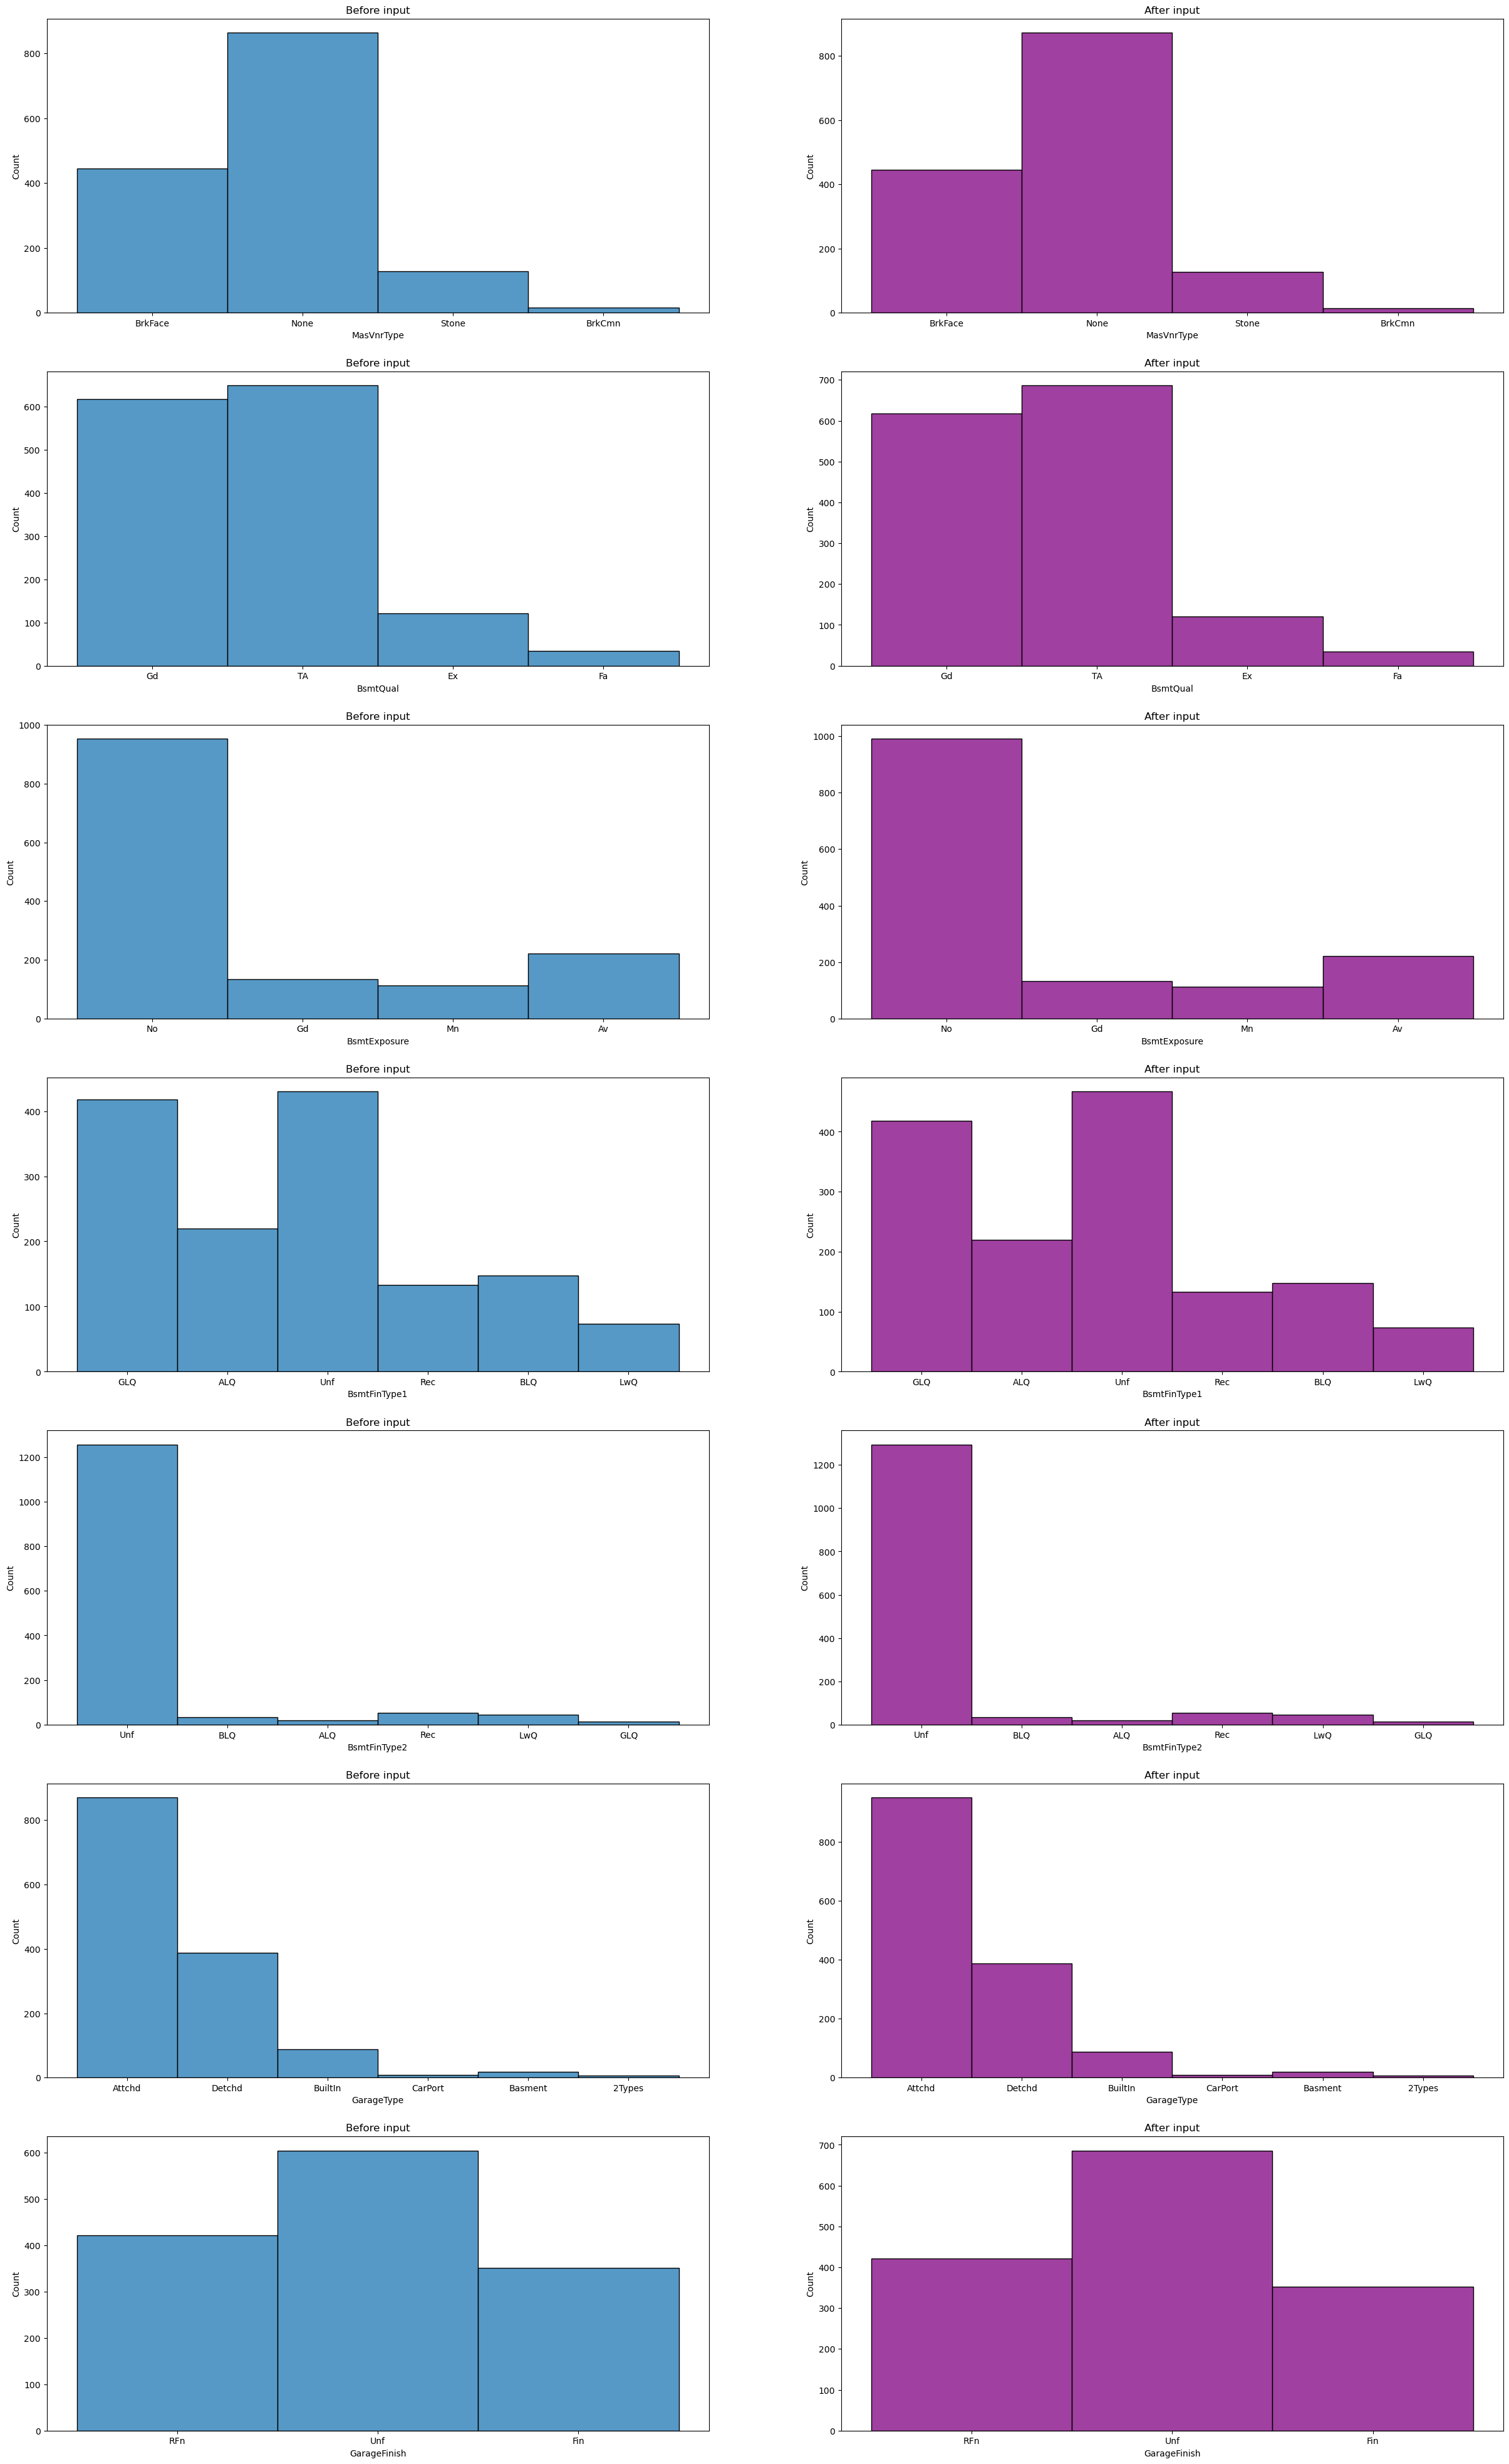

In [64]:
#training test
df_before_imput =  df_train_cat[features_cat_missing_train]
df_after_imput =  df_train_cat_imput[features_cat_missing_train]
distributionMissingDataAfterInputCat(df_before_imput, df_after_imput, features_cat_missing_train)

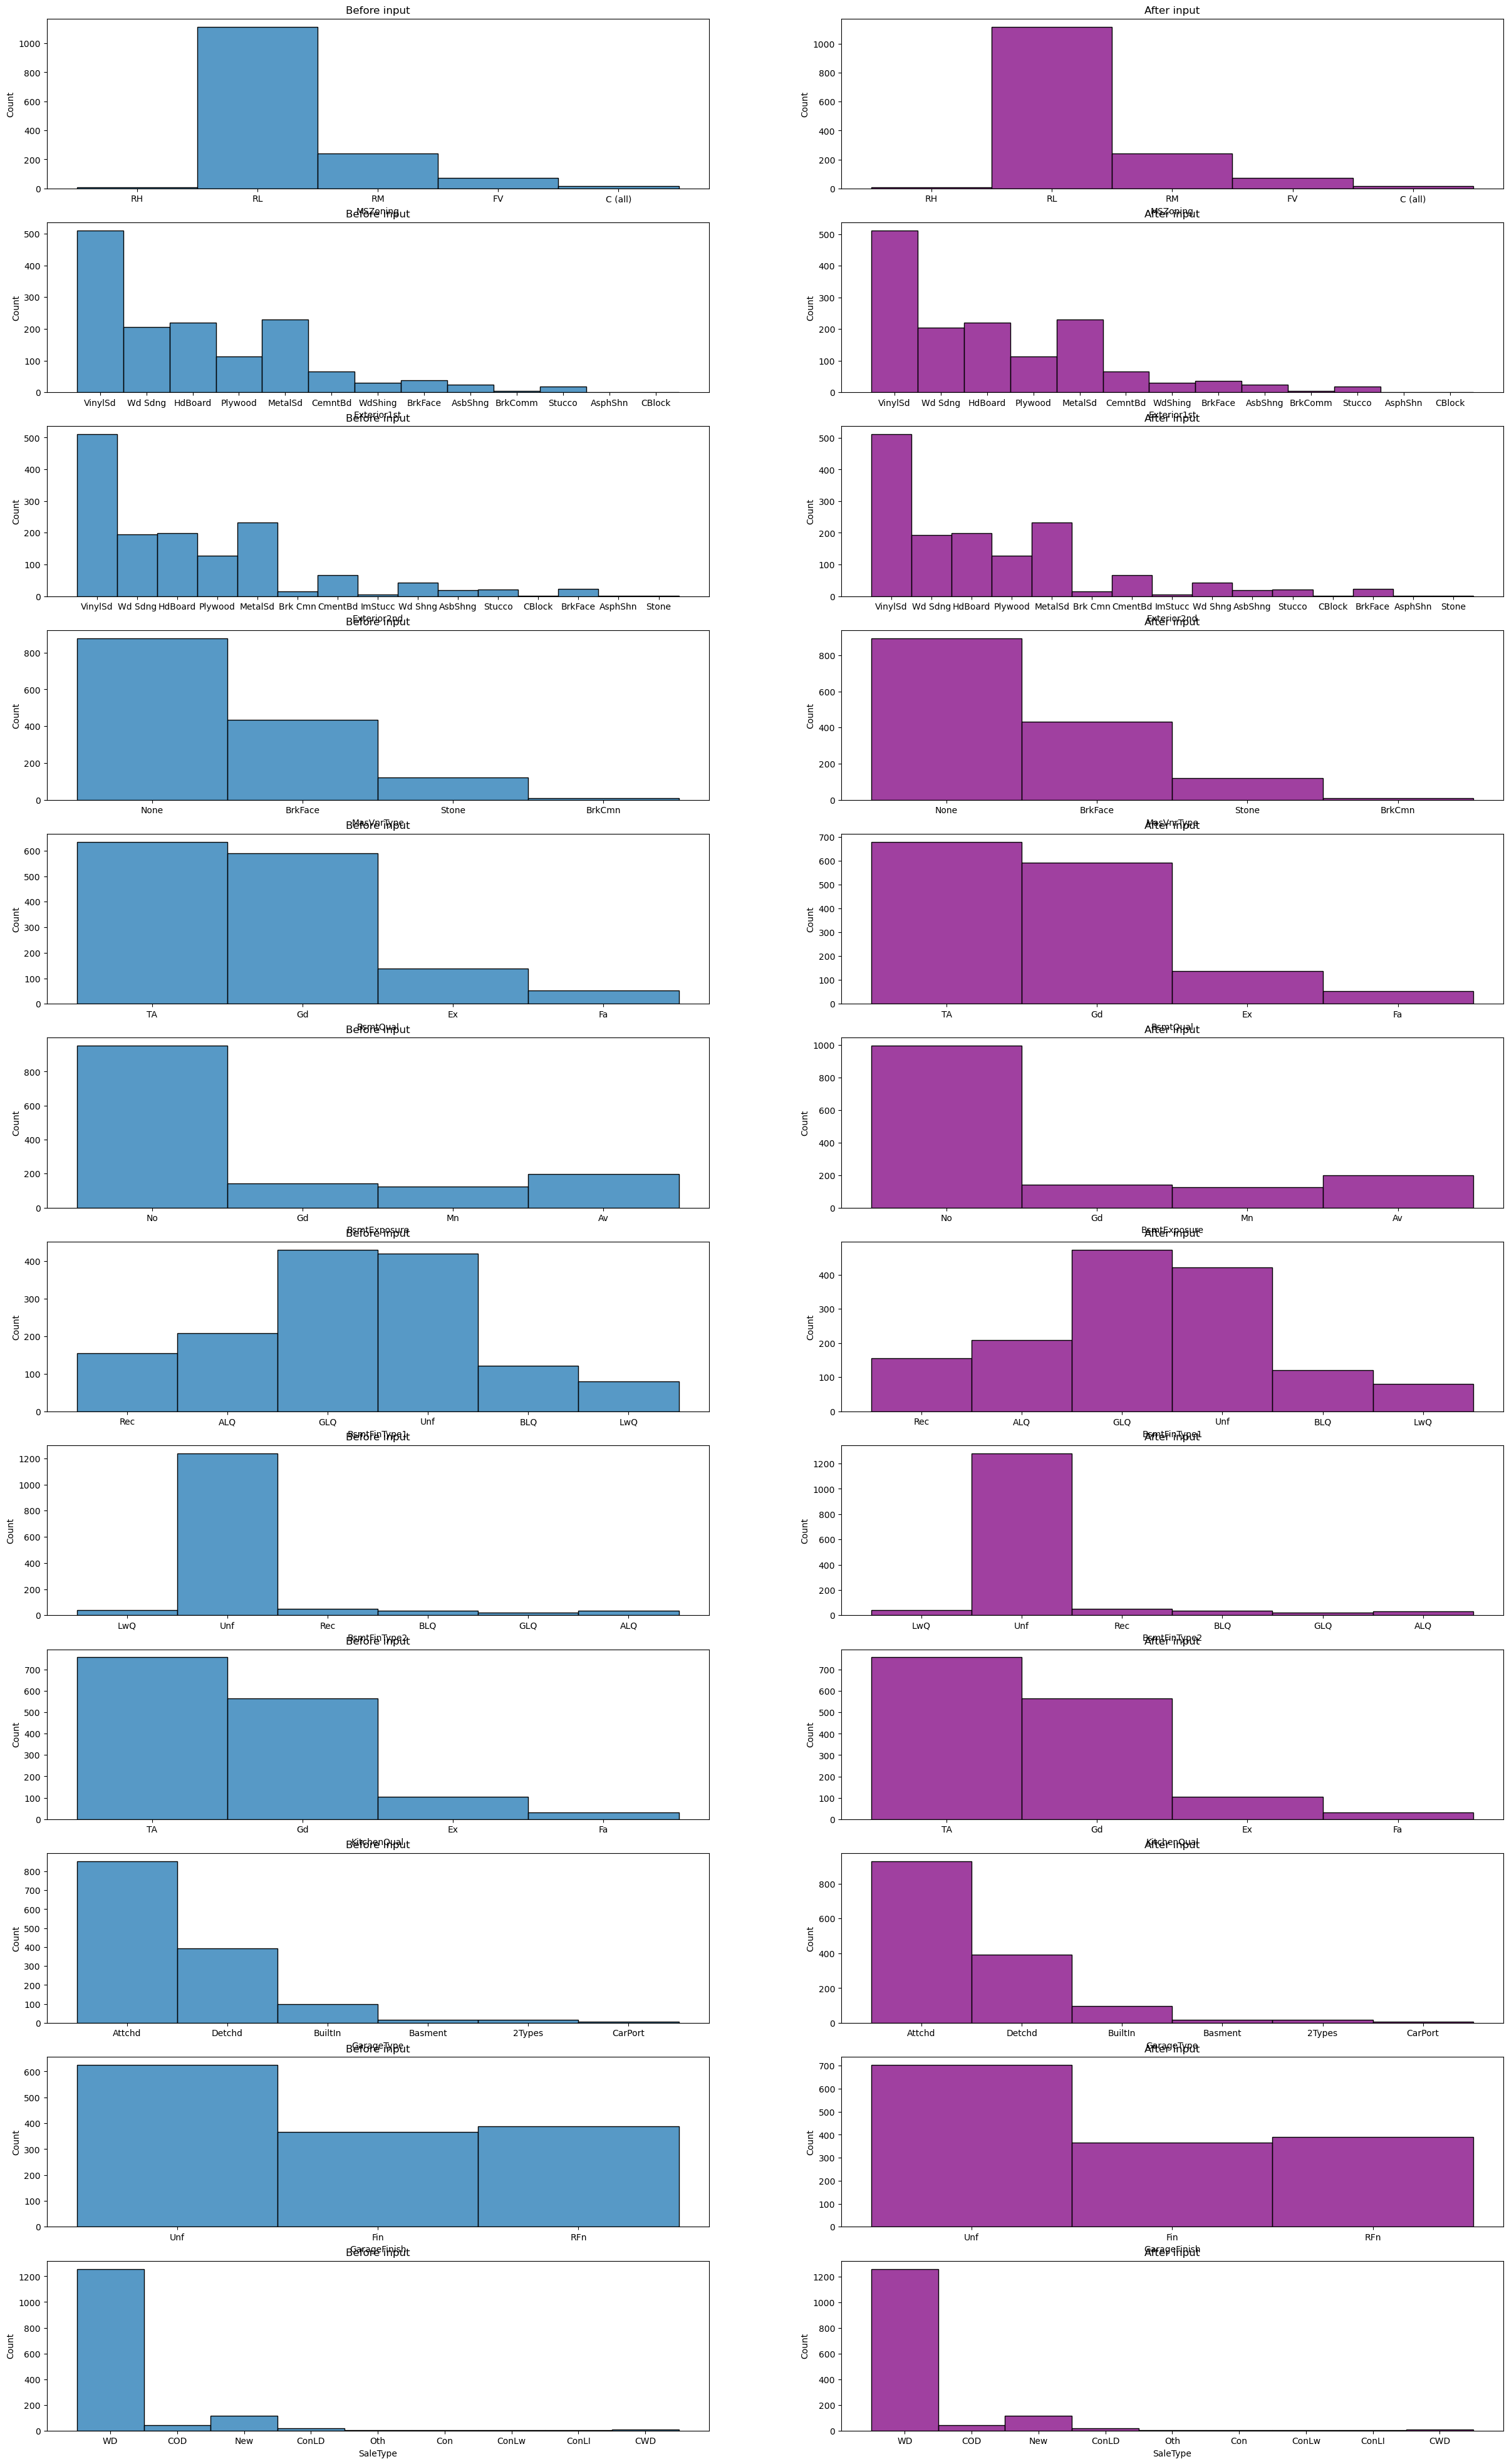

In [65]:
#testing test
df_before_imput =  df_test_cat[features_cat_missing_test]
df_after_imput =  df_test_cat_imput[features_cat_missing_test]
distributionMissingDataAfterInputCat(df_before_imput, df_after_imput, features_cat_missing_test)

***Comments***
* Every features will be kept because the distribution has not changed

#### Correlation

##### Correlation among features and target

In [66]:
df_train_cat_dist = df_train_cat_imput.copy()
df_train_cat_dist['SalePrice'] = df_train['SalePrice']

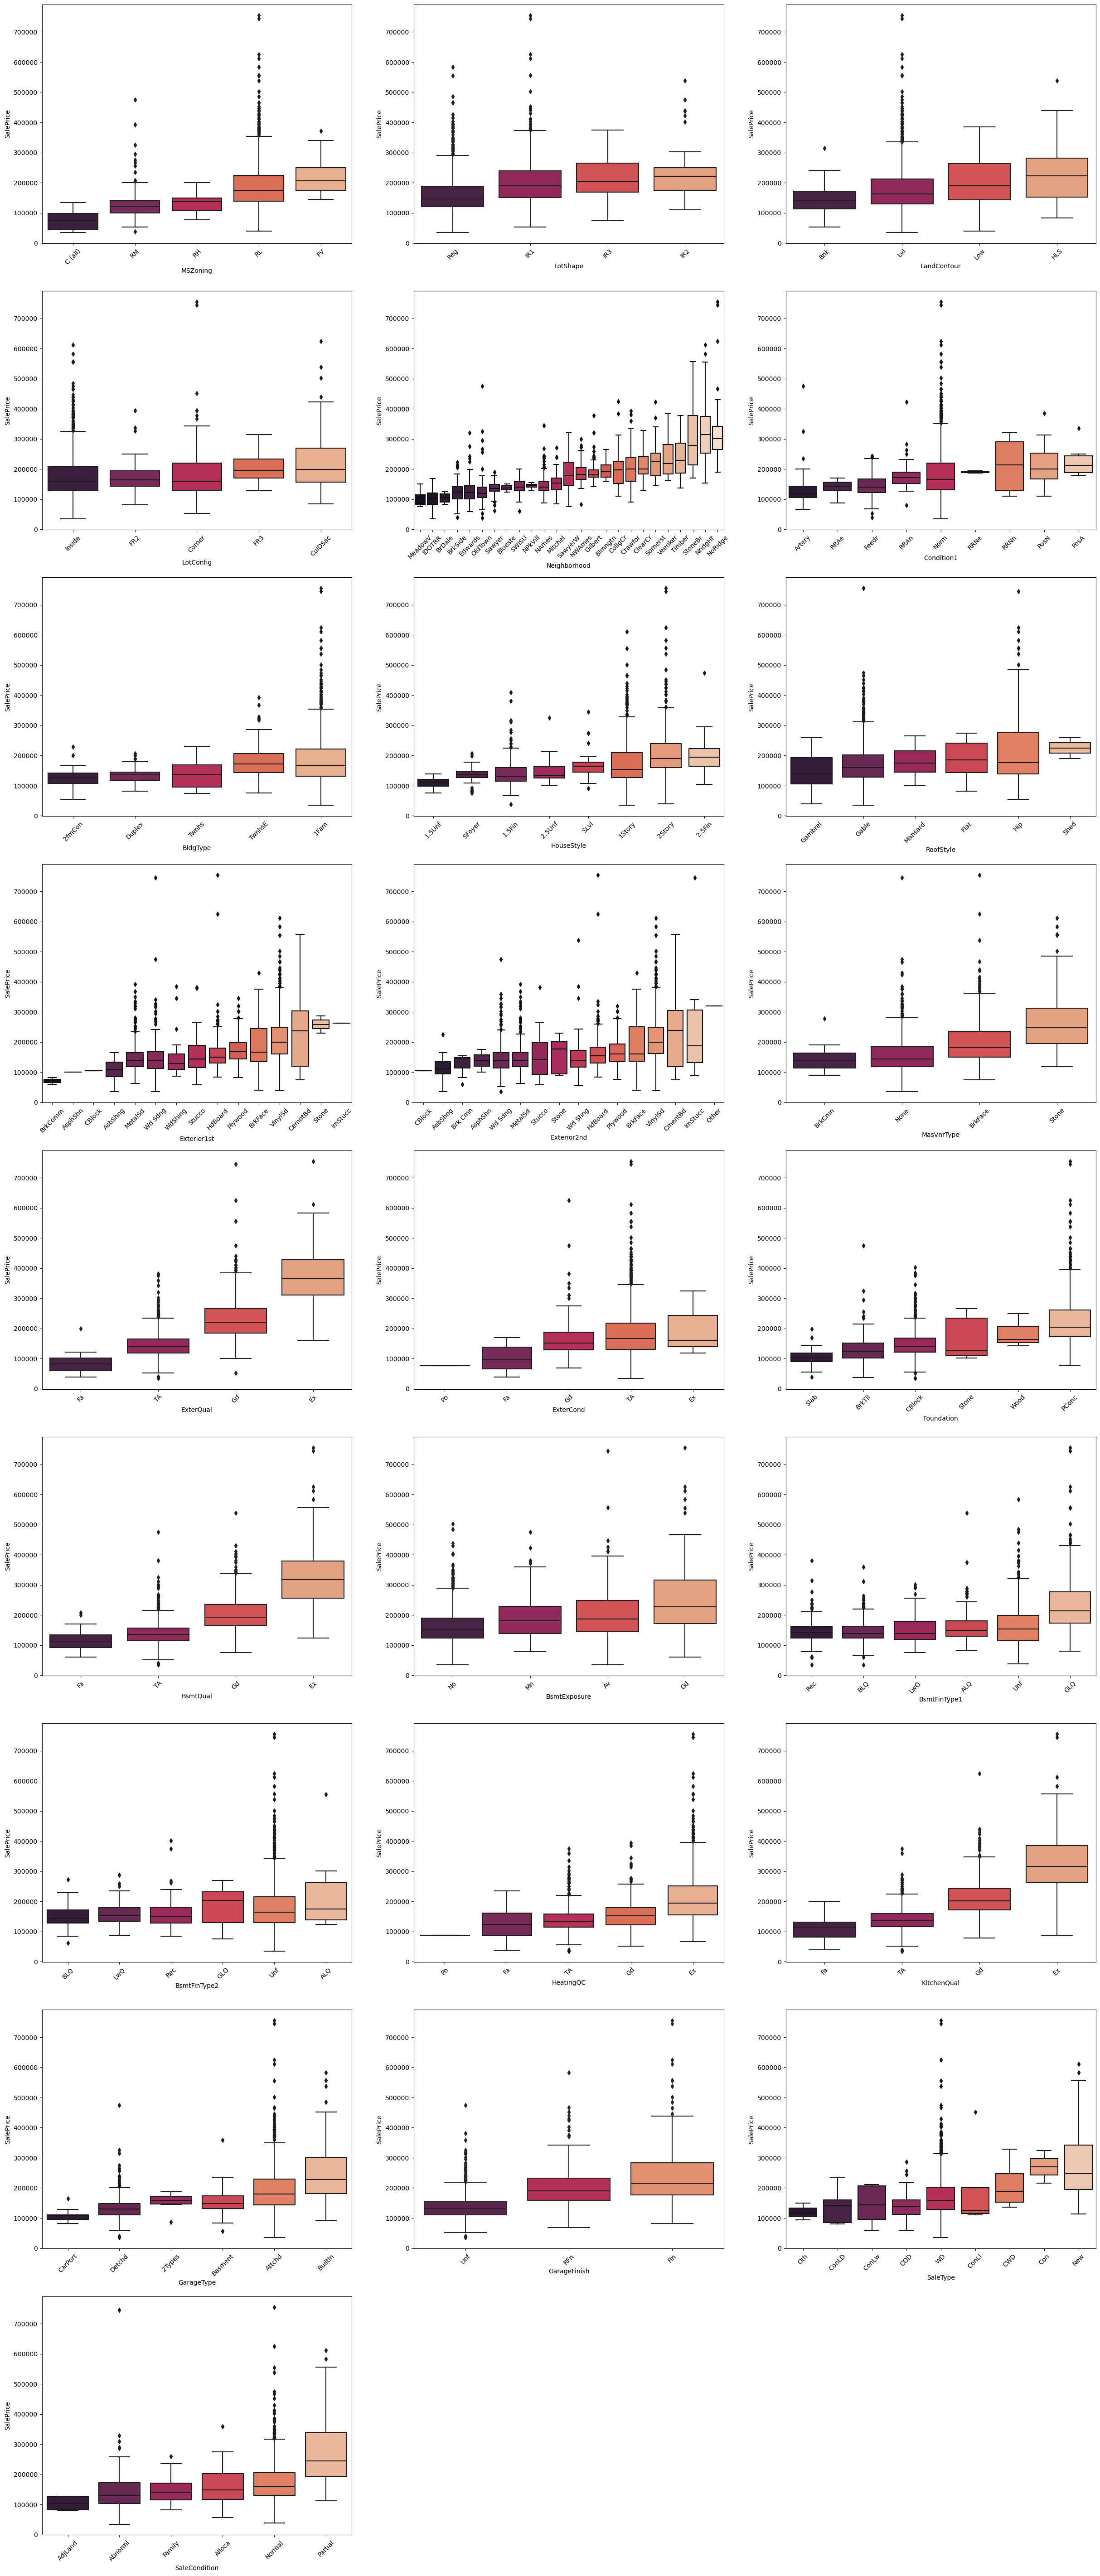

In [67]:
ax= 1
plt.subplots(figsize=(30, 130))
for column in df_train_cat_imput.columns:
    plt.subplot(16,3, ax)
    my_order =  df_train_cat_dist.groupby(str(column))['SalePrice'].mean().sort_values().index.tolist()
    plt.xticks (rotation = 45)
    sns.boxplot(data = df_train_cat_dist, x = column, y= 'SalePrice', order = my_order, palette='rocket')
    ax = ax+1

***Comments***
* The feature have similar distribution, such as:
    * 'KitchenQual'
    * 'BsmtQual'
    * 'ExterQual'

##### Correlation among features

**Cramers V**

In [68]:
import scipy.stats as ss

In [69]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


In [70]:
df_cramers_v = pd.DataFrame(np.nan, columns=df_train_cat_imput.columns.tolist(), index=df_train_cat_imput.columns.tolist())

In [71]:
for column1 in df_train_cat:
    for column2 in df_train_cat:
        confusion_matrix = pd.crosstab(df_train_cat[str(column1)], df_train_cat[str(column2)])
        crs_v = cramers_v(confusion_matrix.values) 
        df_cramers_v[str(column1)][str(column2)] =  crs_v        

<AxesSubplot:>

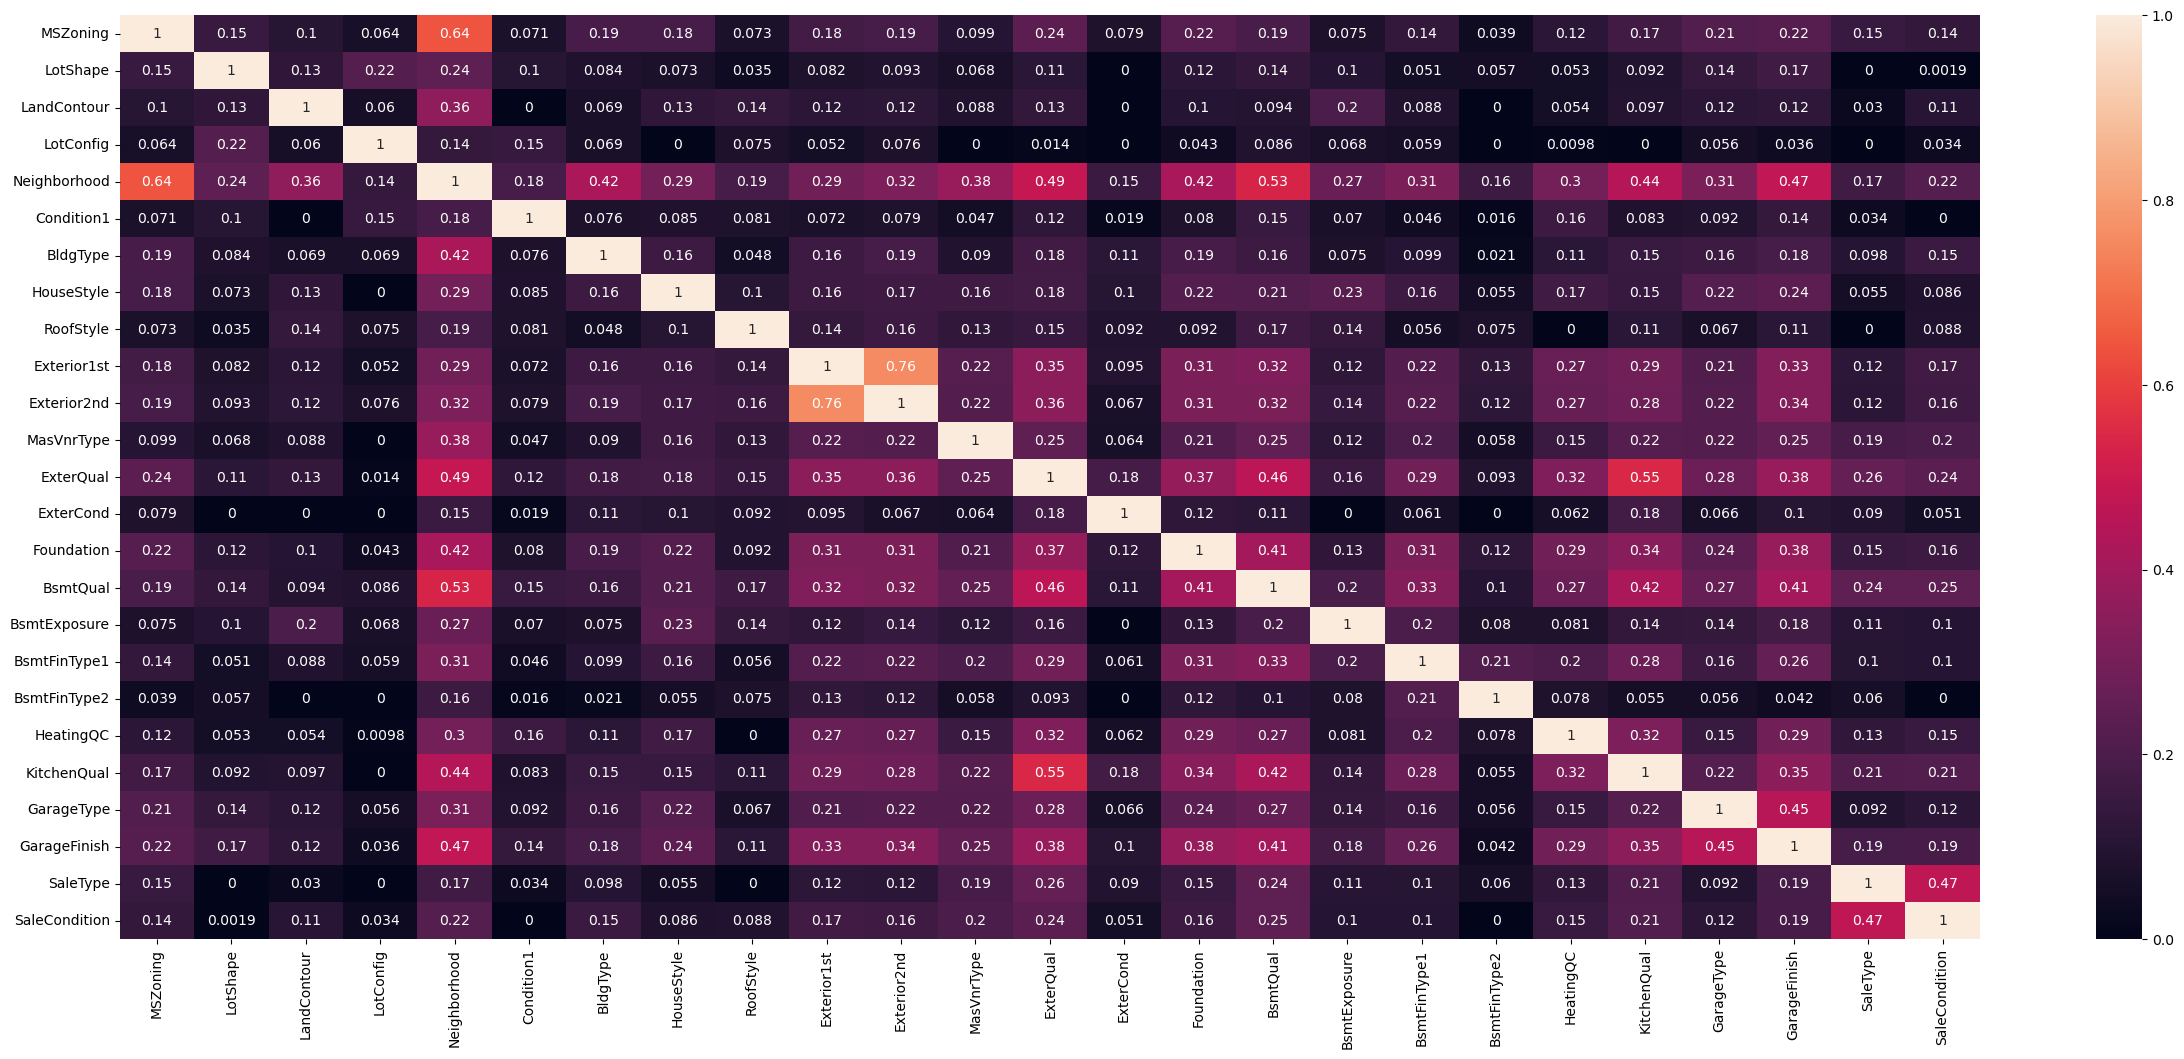

In [72]:
plt.figure(figsize=(30,12))
sns.heatmap(df_cramers_v, annot=True)

***Comments***

* Some features have high and moderate correlation with each other, such as:
    * 'Exterior1st' and 'Exterior2nd' - 0.76
    * 'MSZoning' and 'Neighborhoodd' - 0.64
    * 'KitchenQual' and 'ExterQual' - 0.61

**Removing features**

***Comments***
* Features with high/moderate correlation with each other only one of them will be kept.
    * 'Exterior1st' 
    * 'Neighborhoodd'
    * 'KitchenQual'

In [73]:
feature_not_retained = ['Exterior2nd','MSZoning','ExterQual']
df_train_cat_imput.drop(feature_not_retained, axis=1, inplace = True)
df_test_cat_imput.drop(feature_not_retained, axis=1, inplace = True)

#### Encoding Categorical Data

In [74]:
df_train_dummie = pd.get_dummies(df_train_cat_imput)
df_test_dummie = pd.get_dummies(df_test_cat_imput)

In [75]:
df_train_dummie.shape

(1460, 149)

In [76]:
df_test_dummie.shape

(1459, 146)

In [77]:
#figure out different columns among training and testing set
dif_columns = [column for column in df_train_dummie.columns if column not in df_test_dummie.columns]
dif_columns

['HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Exterior1st_Stone']

***Comments***
* The training and testing set should have the same features, so the different columns will be dropped

In [78]:
#dropping columns
df_train_dummie.drop(dif_columns, axis=1, inplace=True)

# Data Preparation

## Merging Numerical and Categorical Data

In [79]:
df_train_num_impute_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   float64
 1   OverallQual   1460 non-null   float64
 2   MasVnrArea    1460 non-null   float64
 3   BsmtFinSF1    1460 non-null   float64
 4   BsmtUnfSF     1460 non-null   float64
 5   1stFlrSF      1460 non-null   float64
 6   2ndFlrSF      1460 non-null   float64
 7   GrLivArea     1460 non-null   float64
 8   BsmtFullBath  1460 non-null   float64
 9   FullBath      1460 non-null   float64
 10  HalfBath      1460 non-null   float64
 11  Fireplaces    1460 non-null   float64
 12  GarageCars    1460 non-null   float64
 13  WoodDeckSF    1460 non-null   float64
 14  OpenPorchSF   1460 non-null   float64
 15  SalePrice     1460 non-null   float64
 16  AgeBuild      1460 non-null   float64
 17  AgeRemode     1460 non-null   float64
dtypes: float64(18)
memory usage:

In [80]:
#training set
df_train_proc = pd.concat([df_train_num_impute_log, df_train_dummie], axis = 1)
df_train_proc.shape

(1460, 164)

In [81]:
#testing set
df_test_proc = pd.concat([df_test_num_impute_log, df_test_dummie], axis = 1)
df_test_proc.shape

(1459, 163)

## Splitting the dataset into target feature and predictors

In [82]:
X = df_train_proc.drop('SalePrice', axis = 1)
X.shape

(1460, 163)

In [83]:
y = df_train_proc['SalePrice']
y.shape

(1460,)

## Feature Scaling 

In [84]:
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()

In [85]:
#training set
X_std=  sc.fit_transform(X)

#testing set
X_std_test = sc.fit_transform(df_test_proc)

In [86]:
X_std.shape

(1460, 163)

In [87]:
X_std_test.shape

(1459, 163)

In [88]:
X = pd.DataFrame(X_std, columns =  X.columns)
X.head()

LotArea  OverallQual  MasVnrArea  BsmtFinSF1  BsmtUnfSF  1stFlrSF  \
0 -0.133270     0.651479    1.193074    0.779431  -0.340511 -0.803645   
1  0.113413    -0.071836   -0.815959    0.888257   0.002218  0.418479   
2  0.420049     0.651479    1.121030    0.654803   0.230372 -0.576677   
3  0.103317     0.651479   -0.815959    0.384539   0.348034 -0.439421   
4  0.878431     1.374795    1.412710    0.754400   0.295711  0.112127   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  ...  SaleType_ConLw  \
0  1.180528   0.529194      1.148788  0.789741  ...       -0.058621   
1 -0.870117  -0.381965     -0.833225  0.789741  ...       -0.058621   
2  1.184762   0.659631      1.148788  0.789741  ...       -0.058621   
3  1.143550   0.541448      1.148788 -1.026041  ...       -0.058621   
4  1.244087   1.282295      1.148788  0.789741  ...       -0.058621   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0     -0.301962     -0.045376     0.390293              -0.272616   
1     -0.301962     -0.045376     0.390293              -0.272616   
2     -0.301962     -0.045376     0.390293              -0.272616   
3     -0.301962     -0.045376     0.390293               3.668167   
4     -0.301962     -0.045376     0.390293              -0.272616   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0              -0.052414             -0.091035             -0.117851   
1              -0.052414             -0.091035             -0.117851   
2              -0.052414             -0.091035             -0.117851   
3              -0.052414             -0.091035             -0.117851   
4              -0.052414             -0.091035             -0.117851   

   SaleCondition_Normal  SaleCondition_Partial  
0              0.467651              -0.305995  
1              0.467651              -0.305995  
2              0.467651              -0.305995  
3             -2.138345              -0.305995  
4              0.467651              -0.305995  

[5 rows x 163 columns]

In [89]:
df_test_proc  = pd.DataFrame(X_std_test, columns =  X.columns)
df_test_proc.head()

LotArea  OverallQual  MasVnrArea  BsmtFinSF1  BsmtUnfSF  1stFlrSF  \
0  0.561787    -0.751101   -0.797004    0.648586  -0.002265 -0.612887   
1  0.970407    -0.054877    0.995686    0.876910   0.214216  0.588954   
2  0.908413    -0.751101   -0.797004    0.825007  -0.361493 -0.505930   
3  0.257857    -0.054877    0.366390    0.733205   0.094456 -0.512506   
4 -1.116969     1.337571   -0.797004    0.455095   0.702215  0.474414   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  ...  SaleType_ConLw  \
0 -0.857154  -1.442112     -0.837502 -1.028720  ...       -0.045392   
1 -0.857154  -0.194908     -0.837502 -1.028720  ...       -0.045392   
2  1.153084   0.449155     -0.837502  0.773083  ...       -0.045392   
3  1.142867   0.400213     -0.837502  0.773083  ...       -0.045392   
4 -0.857154  -0.313771     -0.837502  0.773083  ...       -0.045392   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0     -0.295268     -0.052432     0.398568              -0.254879   
1     -0.295268     -0.052432     0.398568              -0.254879   
2     -0.295268     -0.052432     0.398568              -0.254879   
3     -0.295268     -0.052432     0.398568              -0.254879   
4     -0.295268     -0.052432     0.398568              -0.254879   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0              -0.074253             -0.091066             -0.134699   
1              -0.074253             -0.091066             -0.134699   
2              -0.074253             -0.091066             -0.134699   
3              -0.074253             -0.091066             -0.134699   
4              -0.074253             -0.091066             -0.134699   

   SaleCondition_Normal  SaleCondition_Partial  
0              0.460211              -0.299365  
1              0.460211              -0.299365  
2              0.460211              -0.299365  
3              0.460211              -0.299365  
4              0.460211              -0.299365  

[5 rows x 163 columns]

In [90]:
y = pd.DataFrame(y.values.reshape(len(y),1),  columns = ['SalePrice'])
y.head()

SalePrice
0  12.247699
1  12.109016
2  12.317171
3  11.849405
4  12.429220

### Backward Stepwise Regression

In [91]:
import statsmodels.api as sm
def backwardElimination(x, y, threshold_out):
    removed_features = []
    for i in range(0, len(x.columns)):
        regressor_OLS = sm.OLS(y, sm.add_constant(x)).fit()     
        maxPValues = regressor_OLS.pvalues.max()
        indexMaxPValue = regressor_OLS.pvalues.idxmax()
        if maxPValues > threshold_out:
            x.drop([indexMaxPValue], axis = 1, inplace = True)
            removed_features.append(indexMaxPValue)
            
    print(removed_features)
    return removed_features

In [92]:
x = X.copy()
removed_features = backwardElimination(x, y, 0.05)

['BldgType_2fmCon', 'Exterior1st_Stucco', 'Exterior1st_Wd Sdng', 'Condition1_PosA', 'GarageType_Attchd', 'AgeBuild', 'Neighborhood_Gilbert', 'RoofStyle_Hip', 'RoofStyle_Flat', 'Neighborhood_Blueste', 'BsmtExposure_Mn', 'BsmtExposure_Av', 'Exterior1st_WdShing', 'Condition1_RRAn', 'GarageFinish_RFn', 'BsmtQual_Gd', 'BsmtFinType1_ALQ', 'GarageFinish_Fin', 'SaleType_ConLD', 'SaleType_CWD', 'SaleType_Con', 'RoofStyle_Gable', 'HeatingQC_Po', 'HeatingQC_Ex', 'Neighborhood_Timber', 'HouseStyle_SLvl', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'Exterior1st_CBlock', 'LotShape_Reg', 'GarageFinish_Unf', 'Condition1_RRNe', 'SaleCondition_Partial', 'SaleCondition_Family', 'GarageType_BuiltIn', 'Neighborhood_CollgCr', 'Neighborhood_SawyerW', 'Neighborhood_BrkSide', '2ndFlrSF', '1stFlrSF', 'RoofStyle_Shed', 'MasVnrType_BrkCmn', 'MasVnrType_None', 'ExterCond_TA', 'BsmtQual_Fa', 'BsmtQual_TA', 'LotShape_IR1', 'LandContour_Low', 'Condition1_PosN', 'BsmtUnfSF', 'Neighborhood_Blmngtn', 'BldgType_TwnhsE', 'Bsm

In [93]:
X.drop(removed_features, axis = 1, inplace = True)
X.shape

(1460, 53)

In [94]:
#drop to testing set
df_test_proc.drop(removed_features, axis = 1, inplace = True)
df_test_proc.shape

(1459, 53)

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Feature'] = X.columns

In [96]:
vif_info

VIF               Feature
0   2.288413               LotArea
1   3.570321           OverallQual
2   2.020948            BsmtFinSF1
3   4.438535             GrLivArea
4   1.888912          BsmtFullBath
5   2.747377              FullBath
6   2.123058              HalfBath
7   1.582582            Fireplaces
8   2.038315            GarageCars
9   1.250337            WoodDeckSF
10  2.430733             AgeRemode
11  1.064355          LotShape_IR3
12  1.611372       LandContour_HLS
13  1.734902       LandContour_Lvl
14  1.121566     LotConfig_CulDSac
15  1.263189  Neighborhood_Crawfor
16  1.338075  Neighborhood_Edwards
17  1.223485   Neighborhood_IDOTRR
18  1.273371  Neighborhood_MeadowV
19  1.172899  Neighborhood_Mitchel
20  1.723903    Neighborhood_NAmes
21  1.209849  Neighborhood_NoRidge
22  1.633194  Neighborhood_NridgHt
23  1.512710  Neighborhood_OldTown
24  1.308003   Neighborhood_Sawyer
25  1.386965  Neighborhood_Somerst
26  1.183363  Neighborhood_StoneBr
27  1.154721       Condition1_Norm
28  1.127532       Condition1_RRAe
29  1.657499         BldgType_1Fam
30  1.525955     HouseStyle_1.5Fin
31  2.579443     HouseStyle_2Story
32  1.191243     HouseStyle_SFoyer
33  1.068092   Exterior1st_BrkComm
34  1.130858   Exterior1st_BrkFace
35  1.186896   Exterior1st_MetalSd
36  1.052431          ExterCond_Ex
37  1.142041          ExterCond_Fa
38  1.032038          ExterCond_Po
39  1.420534     Foundation_BrkTil
40  1.201512       Foundation_Slab
41  1.851273           BsmtQual_Ex
42  1.321911       BsmtExposure_Gd
43  1.184261      BsmtFinType1_LwQ
44  1.274247      BsmtFinType1_Rec
45  1.104340      BsmtFinType2_ALQ
46  1.238156          HeatingQC_Fa
47  1.327966          HeatingQC_Gd
48  1.743796          HeatingQC_TA
49  1.620815        KitchenQual_Ex
50  1.084609     GarageType_2Types
51  2.385271          SaleType_New
52  1.835507  SaleCondition_Normal

In [97]:
df_vif = vif_info[vif_info['VIF']>5]
df_vif

Empty DataFrame
Columns: [VIF, Feature]
Index: []

In [98]:
features_high_mult = df_vif['Feature'].tolist()

In [99]:
#X.drop(features_high_mult, axis = 1, inplace = True)
X = X.drop(features_high_mult, axis = 1)
X.shape

(1460, 53)

In [100]:
#drop to testing set
df_test_proc.drop(features_high_mult, axis = 1, inplace = True)
df_test_proc.shape

(1459, 53)

## Splitting the dataset into the Training set and Test set

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Data Modeling

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from math import sqrt

In [103]:
columns = ['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error']
modelPerformance =  pd.DataFrame(columns = columns)

In [104]:
def ModelEvaluation(model, y_test, y_pred):
    r_square = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse) 
    df = pd.DataFrame([[model, r_square, mae, mse, rmse]], columns = columns)
    print (f'R²: {r_square}')
    print (f'MAE: {mae}')
    print (f'MSE: {mse}')
    print (f'RMSE: {rmse}')
    return df

### 1. K-nearest neighbors Regressor

In [105]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 10)
knn.fit(X_train, y_train)  #fit the model
y_pred = knn.predict(X_test) #make prediction on test set
df = ModelEvaluation('KNN', y_test, y_pred)
modelPerformance = pd.concat([modelPerformance, df])

R²: 0.7658160109209491
MAE: 0.14173925141022808
MSE: 0.0406434184730624
RMSE: 0.2016021291382172


In [106]:
sns.scatterplot(x = y_pred.flatten(), y = y_test['SalePrice'])

<AxesSubplot:ylabel='SalePrice'>

#### K-nearest neighbors Regressor parameters optimized

In [107]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[6, 7, 8, 9, 10, 11, 12]}

model_knn = GridSearchCV(KNeighborsRegressor(), params)
model_knn.fit(X_train, y_train)
model_knn.best_params_ 

{'n_neighbors': 9}

In [108]:
knn_opt = KNeighborsRegressor(n_neighbors = model_knn.best_params_['n_neighbors'])
knn_opt.fit(X_train, y_train)  #fit the model
y_pred  =knn_opt.predict(X_test) #make prediction on test set
df = ModelEvaluation('KNN Optimized', y_test, y_pred)
modelPerformance = pd.concat([modelPerformance, df])

R²: 0.7698511132969567
MAE: 0.14127089006085694
MSE: 0.03994311289241759
RMSE: 0.19985773163032144


### 2. Random Forest

In [109]:
# Training the Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 50, random_state =0)
rf.fit(X_train, np.ravel(y_train,order='C'))
y_pred = rf.predict(X_test) #make prediction on test set
df = ModelEvaluation('Randon Forest', y_test, y_pred)
modelPerformance = pd.concat([modelPerformance, df])

R²: 0.8740619088319757
MAE: 0.10310409417279434
MSE: 0.02185697904100902
RMSE: 0.1478410600645471


#### Random Forest parameters optimized

In [110]:
params = {'n_estimators':[10, 50, 100, 200, 300]}

model_rf = GridSearchCV(RandomForestRegressor(), params)
model_rf.fit(X_train, np.ravel(y_train,order='C'))
model_rf.best_params_ 

{'n_estimators': 50}

In [111]:
rf_opt = RandomForestRegressor(n_estimators = model_rf.best_params_['n_estimators'], random_state = 0)
rf_opt.fit(X_train,  np.ravel(y_train,order='C'))  #fit the model
y_pred  = rf_opt.predict(X_test) #make prediction on test set
df = ModelEvaluation('Randon Forest Optimized', y_test, y_pred)
modelPerformance = pd.concat([modelPerformance, df])

R²: 0.8740619088319757
MAE: 0.10310409417279434
MSE: 0.02185697904100902
RMSE: 0.1478410600645471


### 3. AdaBoost

In [112]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor(n_estimators = 50, random_state =0)
ab.fit(X_train, np.ravel(y_train,order='C'))
y_pred = ab.predict(X_test) #make prediction on test set
df = ModelEvaluation('AdaBoost', y_test, y_pred)
modelPerformance = pd.concat([modelPerformance, df])

R²: 0.8376465726678424
MAE: 0.12936523080917187
MSE: 0.028176983036058
RMSE: 0.16786001023489186


#### AdaBoost parameters optimized

In [113]:
params = {'n_estimators':[10, 50, 100, 200, 300]}

model_ab = GridSearchCV(AdaBoostRegressor(), params)
model_ab.fit(X_train, np.ravel(y_train,order='C'))
model_ab.best_params_ 

{'n_estimators': 200}

In [114]:
ab_op = AdaBoostRegressor(n_estimators = model_rf.best_params_['n_estimators'], random_state =0)
ab_op.fit(X_train, np.ravel(y_train,order='C'))
y_pred = ab_op.predict(X_test) #make prediction on test set
df = ModelEvaluation('AdaBoost Optimized', y_test, y_pred)
modelPerformance = pd.concat([modelPerformance, df])

R²: 0.8376465726678424
MAE: 0.12936523080917187
MSE: 0.028176983036058
RMSE: 0.16786001023489186


### 4. Ridge Regression

In [115]:
from sklearn.linear_model import Ridge
rdg = Ridge(alpha=0.01)
rdg.fit(X_train, y_train)
y_pred = rdg.predict(X_test) #make prediction on test set
df = ModelEvaluation('Ridge Regression', y_test, y_pred)
modelPerformance = pd.concat([modelPerformance, df])

R²: 0.8909715355773545
MAE: 0.0964448121239658
MSE: 0.018922256480604888
RMSE: 0.13755819306971465


#### Ridge Regression optimized

In [116]:
params = {'alpha':[0.001, 0.01, 0.1, 1, 10]}

model_rdg = GridSearchCV(Ridge(), params)
model_rdg.fit(X_train, np.ravel(y_train,order='C'))
model_rdg.best_params_ 

{'alpha': 10}

In [117]:
rdg_op = Ridge(alpha= model_rdg.best_params_['alpha'])
rdg_op.fit(X_train, y_train)
y_pred = rdg_op.predict(X_test) #make prediction on test set
df = ModelEvaluation('Ridge Regression Optimized', y_test, y_pred)
modelPerformance = pd.concat([modelPerformance, df])

R²: 0.8912219384182977
MAE: 0.09629880135471922
MSE: 0.018878798225874002
RMSE: 0.13740013910427457


### 5. Lasso Regression

In [118]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test) #make prediction on test set
df = ModelEvaluation('Lasso Regression', y_test, y_pred)
modelPerformance = pd.concat([modelPerformance, df])

R²: 0.8871353812902647
MAE: 0.09731256901542251
MSE: 0.019588033951688944
RMSE: 0.13995725758848288


#### Lasso Regression optimized

In [119]:
params = {'alpha':[0.001, 0.01, 0.1, 1, 10]}

model_lasso = GridSearchCV(Lasso(), params)
model_lasso.fit(X_train, np.ravel(y_train,order='C'))
model_lasso.best_params_ 

{'alpha': 0.001}

In [120]:
lasso_op = Ridge(alpha= model_lasso.best_params_['alpha'])
lasso_op.fit(X_train, y_train)
y_pred = lasso_op.predict(X_test) #make prediction on test set
df = ModelEvaluation('Lasso Regression Optimized', y_test, y_pred)
modelPerformance = pd.concat([modelPerformance, df])

R²: 0.8909712592423906
MAE: 0.09644495129698637
MSE: 0.018922304439466724
RMSE: 0.13755836739168842


# Result

In [121]:
#final results
modelPerformance

Model  R-squared (R²)  Mean Absolute Error  \
0                         KNN        0.765816             0.141739   
0               KNN Optimized        0.769851             0.141271   
0               Randon Forest        0.874062             0.103104   
0     Randon Forest Optimized        0.874062             0.103104   
0                    AdaBoost        0.837647             0.129365   
0          AdaBoost Optimized        0.837647             0.129365   
0            Ridge Regression        0.890972             0.096445   
0  Ridge Regression Optimized        0.891222             0.096299   
0            Lasso Regression        0.887135             0.097313   
0  Lasso Regression Optimized        0.890971             0.096445   

   Mean Squared Error  Root Mean Squared Error  
0            0.040643                 0.201602  
0            0.039943                 0.199858  
0            0.021857                 0.147841  
0            0.021857                 0.147841  
0            0.028177                 0.167860  
0            0.028177                 0.167860  
0            0.018922                 0.137558  
0            0.018879                 0.137400  
0            0.019588                 0.139957  
0            0.018922                 0.137558

***Comments***
* The best algorithm was the Ridge Regression Optimized, because has the highest R²  and the lowest RMSE

# Predictions

In [122]:
y_pred_test =  np.expm1(rdg_op.predict(df_test_proc))

In [123]:
id_test = df_test['Id']

In [124]:
output = pd.DataFrame({'Id': id_test, 'SalePrice':y_pred_test.flatten()})
output

Id      SalePrice
0     1461  110145.559607
1     1462  157346.101780
2     1463  186955.511699
3     1464  195906.446212
4     1465  205911.817439
...    ...            ...
1454  2915   81969.981257
1455  2916   82167.913412
1456  2917  163162.694028
1457  2918  123688.411585
1458  2919  221046.402261

[1459 rows x 2 columns]

# Submission

In [125]:
output.to_csv('submission.csv', index=False, header=True)